# Mentoría "Predicción de lluvias extremas"

# TP 1: Análisis y Visualización de Datos

## Importacion de librerias

In [1]:
%matplotlib inline

# Descomentar para intalar paquetes
#!pip install pymannkendall
#!pip install PyEMD
#!pip install EMD-signal

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import pymannkendall as mk
import numpy as np
import scipy.stats as st
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from sklearn import preprocessing, svm
from PyEMD import EMD, Visualisation


# Opcion para visualizar tablas en formato ancho
pd.set_option('display.max_columns', None)

Links útiles (ordenados de simples a complejos):

https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

## Lectura de datos

In [2]:
Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/datos_diarios_cordoba.csv", parse_dates = True, index_col="fecha")
id_Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/metadatos_estaciones.csv")

## Previsualización de datos

In [3]:
Datos.drop(columns=['id', 'omm_id']).describe()

,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
count,171930.000000,202229.000000,168343.000000,232801.000000,166202.000000,130758.000000,202279.000000,205391.000000,168350.000000,203718.000000,160329.000000,160366.000000,198257.000000,12497.000000
mean,7.081167,67.169704,3.703177,2.286027,973.357425,1013.785112,10.585408,24.396732,17.657120,11.129973,17.059827,8.044349,2.811324,90.238606
std,3.849349,15.471247,2.620435,8.320615,18.048091,6.509967,6.673138,6.538179,6.248322,6.271125,11.421939,4.866475,2.089806,91.555475
min,0.000000,7.000000,0.000000,0.000000,927.400000,989.900000,-17.600000,-0.400000,-3.300000,-13.000000,0.000000,0.000000,0.000000,10.195410
25%,4.300000,57.000000,1.000000,0.000000,960.500000,1009.200000,5.800000,19.600000,12.900000,6.600000,5.000000,4.100000,1.200000,43.460000
50%,8.100000,68.000000,4.000000,0.000000,970.100000,1013.300000,11.400000,24.800000,18.000000,11.800000,18.000000,7.200000,2.300000,61.953000
75%,10.000000,79.000000,6.000000,0.000000,988.000000,1017.800000,15.900000,29.400000,22.500000,16.100000,23.000000,10.800000,3.900000,101.865600
max,19.100000,100.000000,8.000000,240.000000,1026.700000,1042.600000,30.500000,45.100000,38.500000,31.700000,99.000000,88.500000,24.722222,1403.024000


In [4]:
Datos.head(10)

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
fecha,,,,,,,,,,,,,,,,
1961-01-01,1,87244,NaN,62.0,0.0,0.0,965.9,NaN,15.9,32.3,25.1,13.5,NaN,NaN,1.0,NaN
1961-01-02,2,87244,NaN,66.0,6.0,28.0,969.9,NaN,15.5,27.5,22.2,18.3,NaN,NaN,1.0,NaN
1961-01-03,3,87244,NaN,92.0,8.0,15.4,972.6,NaN,13.1,21.7,14.4,12.9,NaN,NaN,4.5,NaN
1961-01-04,4,87244,NaN,84.0,5.0,0.0,969.6,NaN,17.4,23.1,20.4,13.9,NaN,NaN,0.3,NaN
1961-01-05,5,87244,NaN,84.0,5.0,3.6,965.6,NaN,17.8,23.9,20.7,15.5,NaN,NaN,1.5,NaN
1961-01-06,6,87244,NaN,54.0,0.0,0.0,970.2,NaN,13.2,27.2,23.3,12.7,NaN,NaN,2.2,NaN
1961-01-07,7,87244,NaN,56.0,0.0,0.0,967.7,NaN,15.1,31.4,25.0,12.1,NaN,NaN,2.6,NaN
1961-01-08,8,87244,NaN,59.0,2.0,0.0,965.8,NaN,18.1,32.9,27.0,15.6,NaN,NaN,2.9,NaN
1961-01-09,9,87244,NaN,52.0,3.0,0.0,963.2,NaN,20.4,34.9,31.4,20.4,NaN,NaN,9.4,NaN


In [5]:
Datos.tail(10)

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
fecha,,,,,,,,,,,,,,,,
2017-08-24,249618,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.39352
2017-08-25,249619,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.59718
2017-08-26,249620,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.49365
2017-08-27,249621,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.64530
2017-08-28,249622,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.53622
2017-08-29,249623,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.50303
2017-08-30,249624,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.93904
2017-08-31,249625,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.33246
2017-09-01,249626,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.72549


In [6]:
id_Datos

,id,omm_id,nombre,lon_grad,lon_min,lon_seg,lon_hem,lat_grad,lat_min,lat_seg,lat_hem,lon_dec,lat_dec,elev,institucion_id,nivel_adm1,nivel_adm2,fecha_inicio,tipo,pais_id,siglas
0,1,87244,Villa Maria del Rio Seco,63,43,39.31,W,29,54,20.90,S,-63.727586,-29.905806,341,1,Cordoba,Rio Seco,1/10/1903,C,AR,SMN
1,2,87328,Villa Dolores Aero,65,8,56.54,W,31,57,4.66,S,-65.149040,-31.951295,569,1,Cordoba,San Javier,1/10/1903,C,AR,SMN
2,3,87344,Cordoba Aero,64,12,42.67,W,31,17,47.87,S,-64.211853,-31.296630,474,1,Cordoba,Colon,1/1/1946,C,AR,SMN
3,4,87345,Cordoba Obs.,64,11,53.79,W,31,25,14.73,S,-64.198276,-31.420759,426,1,Cordoba,Capital,1/1/1961,C,AR,SMN
4,5,87349,Pilar Obs.,63,52,55.19,W,31,40,5.11,S,-63.881997,-31.668086,338,1,Cordoba,Rio Segundo,1/1/1907,C,AR,SMN
5,6,87466,Marcos Juarez INTA,62,7,0.00,W,32,41,0.00,S,-62.120000,-32.680000,110,2,Cordoba,Marcos Juarez,10/1/1967,C,AR,INTA
6,7,87453,Rio Cuarto Aero,64,16,37.10,W,33,5,43.80,S,-64.276973,-33.095500,421,1,Cordoba,Rio Cuarto,1/1/1875,C,AR,SMN
7,8,87467,Marcos Juarez Aero,62,9,1.85,W,32,40,46.91,S,-62.150513,-32.679697,114,1,Cordoba,Marcos Juarez,1/1/1947,C,AR,SMN
8,9,87534,Laboulaye Aero,63,22,3.48,W,34,7,40.24,S,-63.367634,-34.127844,137,1,Cordoba,Presidente Roque Saenz PeNaN,1/7/1913,C,AR,SMN
9,10,9987009,Manfredi INTA,63,46,0.00,W,31,49,0.00,S,-63.770000,-31.820000,292,2,Cordoba,Rio Segundo,9/1/1969,C,AR,INTA


## CONSIGNA:

## 1. Estadísticos descriptivos

  1. Para comenzar, calcular el rango de las variables de cada estación.
  2. ¿Existen valores faltantes? Cuantificarlos.
  3. Realizar Box-Blot de cada variable para las diferentes estaciones.
  4. ¿Encuentran outliers en estas variables?


## 2. Agregación de datos
Año hidrológico: 1/julio al 30/junio
  1. Acumulen anualmente los datos de *prcp* (Precipitación Total Anual o PTA), y grafique los promedios en función de la elevación de la estación (*elev*).
  2. Acumulen anualmente los datos de *caudal* (sólo la estación Pueblo Andino tiene estos datos), y determine si la serie es estacionaria (es decir, ¿Hay tendencia?).
  3. Determinar la precipitación máxima diaria anual (PMDA) de cada estación y determinar si existen tendencias.
  4. Repita lo mismo del punto 3 pero para las temperaturas medias.
  5. ¿Las series de PMDA, responden a una distribución Normal? ¿Y las series de PTA?

In [7]:
stations_dataset = id_Datos.copy()
dataset = Datos.copy()

stations = stations_dataset.set_index('omm_id')['nombre'].to_dict()
elevs = stations_dataset.set_index('omm_id')['elev'].to_dict()

## 1.1

In [8]:
dataset_groupby_station = dataset.groupby('omm_id')

dataset_groupby_station_maxvalues = dataset_groupby_station.max()
dataset_groupby_station_minvalues = dataset_groupby_station.min()

rango_df = dataset_groupby_station_maxvalues - dataset_groupby_station_minvalues

rango_df.reset_index(inplace=True)
dataset_groupby_station_maxvalues.reset_index(inplace=True)
dataset_groupby_station_minvalues.reset_index(inplace=True)

rango_df['station'] = rango_df['omm_id'].replace(stations)
dataset_groupby_station_maxvalues['station'] = dataset_groupby_station_maxvalues['omm_id'].replace(stations)
dataset_groupby_station_minvalues['station'] = dataset_groupby_station_minvalues['omm_id'].replace(stations)

### Valores Máximos

In [9]:
display(dataset_groupby_station_maxvalues)

,omm_id,id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,station
0,1,237130,NaN,NaN,NaN,178.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Florida
1,2,249627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1403.024,Pueblo Andino
2,87244,21557,NaN,100.0,8.0,165.0,998.5,1040.6,26.8,44.6,36.7,29.8,36.0,19.0,11.300000,NaN,Villa Maria del Rio Seco
3,87328,43114,14.1,100.0,8.0,104.0,969.8,1040.6,23.3,43.4,38.5,31.7,99.0,42.7,17.100000,NaN,Villa Dolores Aero
4,87344,64671,14.1,100.0,8.0,149.0,983.6,1042.6,24.8,42.4,33.5,26.2,36.0,42.7,11.800000,NaN,Cordoba Aero
5,87345,86228,19.1,99.0,8.0,198.0,989.0,1042.1,25.1,43.5,36.6,27.5,36.0,72.5,10.900000,NaN,Cordoba Obs.
6,87349,107785,13.9,100.0,8.0,150.9,999.9,1042.3,26.0,42.6,36.0,24.8,36.0,77.7,12.500000,NaN,Pilar Obs.
7,87453,129342,14.5,100.0,8.0,163.0,989.2,1042.2,23.3,42.9,33.9,26.6,36.0,48.4,18.100000,NaN,Rio Cuarto Aero
8,87466,148183,14.1,100.0,NaN,172.8,NaN,NaN,26.5,41.8,NaN,28.5,NaN,NaN,24.722222,NaN,Marcos Juarez INTA
9,87467,169740,14.1,100.0,8.0,161.8,1026.7,1041.4,25.9,42.0,34.7,27.0,36.0,82.8,19.900000,NaN,Marcos Juarez Aero


### Valores Mínimos

In [10]:
display(dataset_groupby_station_minvalues)

,omm_id,id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,station
0,1,214883,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Florida
1,2,237131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19541,Pueblo Andino
2,87244,1,NaN,18.0,0.0,0.0,940.0,991.2,-10.7,4.7,0.4,-10.5,0.0,0.0,0.0,NaN,Villa Maria del Rio Seco
3,87328,21558,0.0,12.0,0.0,0.0,927.4,989.9,-17.1,2.2,-1.3,-10.0,0.0,0.0,0.0,NaN,Villa Dolores Aero
4,87344,43115,0.0,14.0,0.0,0.0,939.6,991.2,-14.3,1.2,-1.2,-8.3,0.0,0.0,0.0,NaN,Cordoba Aero
5,87345,64672,0.0,16.0,0.0,0.0,943.5,994.6,-11.2,2.2,0.4,-7.1,0.0,0.0,0.0,NaN,Cordoba Obs.
6,87349,86229,0.0,13.0,0.0,0.0,953.8,990.9,-13.7,2.6,-0.1,-9.0,0.0,0.0,0.0,NaN,Pilar Obs.
7,87453,107786,0.0,14.0,0.0,0.0,946.0,992.4,-17.6,-0.4,-3.3,-10.6,0.0,0.0,0.0,NaN,Rio Cuarto Aero
8,87466,129343,0.0,7.0,NaN,0.0,NaN,NaN,-10.2,3.8,NaN,-10.5,NaN,NaN,0.0,NaN,Marcos Juarez INTA
9,87467,148184,0.0,19.0,0.0,0.0,978.9,991.6,-10.2,3.5,-0.9,-10.2,0.0,0.0,0.0,NaN,Marcos Juarez Aero


### Rango

In [11]:
display(rango_df)

,omm_id,id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,station
0,1,22247,NaN,NaN,NaN,178.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Florida
1,2,12496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1392.82859,Pueblo Andino
2,87244,21556,NaN,82.0,8.0,165.0,58.5,49.4,37.5,39.9,36.3,40.3,36.0,19.0,11.300000,NaN,Villa Maria del Rio Seco
3,87328,21556,14.1,88.0,8.0,104.0,42.4,50.7,40.4,41.2,39.8,41.7,99.0,42.7,17.100000,NaN,Villa Dolores Aero
4,87344,21556,14.1,86.0,8.0,149.0,44.0,51.4,39.1,41.2,34.7,34.5,36.0,42.7,11.800000,NaN,Cordoba Aero
5,87345,21556,19.1,83.0,8.0,198.0,45.5,47.5,36.3,41.3,36.2,34.6,36.0,72.5,10.900000,NaN,Cordoba Obs.
6,87349,21556,13.9,87.0,8.0,150.9,46.1,51.4,39.7,40.0,36.1,33.8,36.0,77.7,12.500000,NaN,Pilar Obs.
7,87453,21556,14.5,86.0,8.0,163.0,43.2,49.8,40.9,43.3,37.2,37.2,36.0,48.4,18.100000,NaN,Rio Cuarto Aero
8,87466,18840,14.1,93.0,NaN,172.8,NaN,NaN,36.7,38.0,NaN,39.0,NaN,NaN,24.722222,NaN,Marcos Juarez INTA
9,87467,21556,14.1,81.0,8.0,161.8,47.8,49.8,36.1,38.5,35.6,37.2,36.0,82.8,19.900000,NaN,Marcos Juarez Aero


## 1.2

Se observan varios valores faltantes. De todas maneras lo vamos a comprobar.

In [12]:
dataset.isna().any()

id          False
omm_id      False
helio        True
hr           True
nub          True
prcp         True
pres_est     True
pres_nm      True
td           True
tmax         True
tmed         True
tmin         True
vmax_d       True
vmax_f       True
vmed         True
caudal       True
dtype: bool

Vemos que todas las variables poseen valores faltantes. 
Procedemos a cuantificarlos:

In [13]:
dataset.groupby('omm_id')[['helio',	'hr',	'nub',	'prcp',	'pres_est',	'pres_nm',	'td',	'tmax',	'tmed',	'tmin',	'vmax_d',	'vmax_f',	'vmed',	'caudal']].apply(lambda x: x.isna().sum())

,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
omm_id,,,,,,,,,,,,,,
1,22248,22248,22248,3746,22248,22248,22248,22248,22248,22248,22248,22248,22248,22248
2,12497,12497,12497,12497,12497,12497,12497,12497,12497,12497,12497,12497,12497,0
87244,21557,601,207,143,520,11814,558,857,221,3091,3896,3896,205,21557
87328,1718,2438,2438,247,2440,3809,2438,518,2437,279,583,583,2443,21557
87344,1281,251,251,7,503,2257,251,434,251,210,575,543,251,21557
87345,896,69,70,42,134,11529,67,59,70,647,47,44,74,21557
87349,760,62,58,3,387,5489,55,338,53,13,2217,2217,53,21557
87453,2446,449,462,46,804,2285,450,662,446,309,2197,2197,462,21557
87466,792,156,18841,44,18841,18841,158,109,18841,94,18841,18841,178,18841


Descripción de variables individuales

In [14]:
Datos[['helio', 'omm_id']].groupby('omm_id').describe()

helio                                               
           count      mean       std  min  25%  50%   75%   max
omm_id                                                         
1            0.0       NaN       NaN  NaN  NaN  NaN   NaN   NaN
2            0.0       NaN       NaN  NaN  NaN  NaN   NaN   NaN
87244        0.0       NaN       NaN  NaN  NaN  NaN   NaN   NaN
87328    19839.0  7.650401  3.679344  0.0  5.3  8.5  10.4  14.1
87344    20276.0  6.891921  3.978367  0.0  3.8  7.7  10.1  14.1
87345    20661.0  6.981705  3.660131  0.0  4.5  7.9   9.8  19.1
87349    20797.0  7.424268  3.813025  0.0  4.9  8.6  10.3  13.9
87453    19111.0  6.609220  3.842550  0.0  3.5  7.5   9.6  14.5
87466    18049.0  7.191224  3.835367  0.0  4.4  8.3  10.1  14.1
87467    20386.0  6.848749  3.914385  0.0  3.8  7.9   9.9  14.1
87534    21037.0  7.270077  3.899772  0.0  4.4  8.3  10.4  14.3
9987009  11774.0  6.678639  3.921086  0.0  3.4  7.8   9.8  14.1
9987013      0.0       NaN       NaN  NaN  NaN  NaN   NaN   NaN
9987015      0.0       NaN       NaN  NaN  NaN  NaN   NaN   NaN

El brillo solar mide tiempo de radiación solar directa sobre la estación meteorológica. Es una variable usualmente medida en estaciones convencionales. En este dataset, cinco estaciones no contaron con datos para esta variable.
Esta variable tiene como rango máximo entre 0 y 24 horas, aunque por la ubicación de las estaciones, esta variable no debería superar las 15 horas de luz por día por lo que valores mayores podrían ser sospechosos

In [15]:
Datos[['hr', 'omm_id']].groupby('omm_id').describe()

hr                                                     
           count       mean        std   min   25%   50%   75%    max
omm_id                                                               
1            0.0        NaN        NaN   NaN   NaN   NaN   NaN    NaN
2            0.0        NaN        NaN   NaN   NaN   NaN   NaN    NaN
87244    20956.0  69.088185  14.849190  18.0  59.0  70.0  80.0  100.0
87328    19119.0  58.639678  16.327115  12.0  47.0  59.0  71.0  100.0
87344    21306.0  67.211114  15.771319  14.0  56.0  68.0  79.0  100.0
87345    21488.0  62.883098  15.357735  16.0  52.0  63.0  74.0   99.0
87349    21495.0  66.157851  16.017916  13.0  55.0  67.0  78.0  100.0
87453    21108.0  65.787048  16.516053  14.0  54.0  66.0  78.0  100.0
87466    18685.0  69.360235  12.670993   7.0  61.0  70.0  78.0  100.0
87467    21349.0  74.380299  12.908554  19.0  66.0  75.0  84.0  100.0
87534    21081.0  69.973910  13.908565  20.0  61.0  71.0  80.0  100.0
9987009  15642.0  67.876806  14.112365  16.0  58.0  69.0  78.0  100.0
9987013      0.0        NaN        NaN   NaN   NaN   NaN   NaN    NaN
9987015      0.0        NaN        NaN   NaN   NaN   NaN   NaN    NaN

La humedad relativa mide el porcentaje de saturación del aire con vapor de agua. En este dataset, cuatro estaciones no contaron con datos para esta variable.
Esta variable tiene un rango teórico entre 0 y 100. 0 indicando máxima sequedad y 100, saturación.

In [16]:
Datos[['pres_est', 'pres_nm',  'omm_id']].groupby('omm_id').describe()

pres_est                                                               \
           count         mean       std    min    25%     50%     75%     max   
omm_id                                                                          
1            0.0          NaN       NaN    NaN    NaN     NaN     NaN     NaN   
2            0.0          NaN       NaN    NaN    NaN     NaN     NaN     NaN   
87244    21037.0   974.466697  5.707001  940.0  970.6   974.1   978.0   998.5   
87328    19117.0   947.556008  5.297338  927.4  944.0   947.2   950.8   969.8   
87344    21054.0   959.074850  5.423100  939.6  955.4   958.7   962.4   983.6   
87345    21423.0   964.559968  5.537208  943.5  960.8   964.2   967.9   989.0   
87349    21170.0   975.262220  5.667356  953.8  971.5   974.9   978.7   999.9   
87453    20753.0   965.081506  5.470323  946.0  961.4   964.7   968.4   989.2   
87466        0.0          NaN       NaN    NaN    NaN     NaN     NaN     NaN   
87467    20927.0  1000.789287  6.053686  978.9  996.5  1000.3  1004.6  1026.7   
87534    20721.0   998.281043  6.013050  978.4  994.1   997.8  1002.0  1024.6   
9987009      0.0          NaN       NaN    NaN    NaN     NaN     NaN     NaN   
9987013      0.0          NaN       NaN    NaN    NaN     NaN     NaN     NaN   
9987015      0.0          NaN       NaN    NaN    NaN     NaN     NaN     NaN   

         pres_nm                                                                
           count         mean       std    min     25%     50%     75%     max  
omm_id                                                                          
1            0.0          NaN       NaN    NaN     NaN     NaN     NaN     NaN  
2            0.0          NaN       NaN    NaN     NaN     NaN     NaN     NaN  
87244     9743.0  1013.571046  6.651482  991.2  1008.9  1013.0  1017.7  1040.6  
87328    17748.0  1012.176583  6.721116  989.9  1007.5  1011.6  1016.4  1040.6  
87344    19300.0  1013.794617  6.480318  991.2  1009.3  1013.3  1017.8  1042.6  
87345    10028.0  1013.573464  6.500118  994.6  1009.0  1013.0  1017.6  1042.1  
87349    16068.0  1014.518895  6.412557  990.9  1010.1  1014.0  1018.5  1042.3  
87453    19272.0  1013.700374  6.420998  992.4  1009.2  1013.2  1017.7  1042.2  
87466        0.0          NaN       NaN    NaN     NaN     NaN     NaN     NaN  
87467    19268.0  1014.166810  6.329090  991.6  1009.7  1013.6  1018.1  1041.4  
87534    19331.0  1014.564218  6.342030  994.0  1010.1  1014.0  1018.5  1042.1  
9987009      0.0          NaN       NaN    NaN     NaN     NaN     NaN     NaN  
9987013      0.0          NaN       NaN    NaN     NaN     NaN     NaN     NaN  
9987015      0.0          NaN       NaN    NaN     NaN     NaN     NaN     NaN

Las variables pres_est y pres_nm miden la presión atmosférica a nivel de la estación y a nivel del mar, respectivamente.
Como las estaciones meteorologicas están por encima del nivel del mar, la columna de aire es menor sobre ellas por lo que la presion de la estación debe ser menor a la presión a nivel del mar.

In [17]:
Datos[['tmed', 'tmax', 'tmin', 'td', 'omm_id']].groupby('omm_id').describe()

tmed                                                       tmax  \
           count       mean       std  min   25%   50%   75%   max    count   
omm_id                                                                        
1            0.0        NaN       NaN  NaN   NaN   NaN   NaN   NaN      0.0   
2            0.0        NaN       NaN  NaN   NaN   NaN   NaN   NaN      0.0   
87244    21336.0  19.052470  6.415357  0.4  14.3  19.4  23.9  36.7  20700.0   
87328    19120.0  18.747265  6.620811 -1.3  13.6  19.3  24.0  38.5  21039.0   
87344    21306.0  17.268018  5.817696 -1.2  12.9  17.8  21.8  33.5  21123.0   
87345    21487.0  18.694829  5.998848  0.4  14.1  19.1  23.3  36.6  21498.0   
87349    21504.0  17.747075  6.039322 -0.1  13.1  18.2  22.4  36.0  21219.0   
87453    21111.0  16.403969  6.037799 -3.3  11.7  16.6  21.2  33.9  20895.0   
87466        0.0        NaN       NaN  NaN   NaN   NaN   NaN   NaN  18732.0   
87467    21356.0  17.037395  6.148934 -0.9  12.3  17.5  21.9  34.7  21180.0   
87534    21130.0  16.385655  6.284809 -1.1  11.3  16.7  21.4  35.4  21528.0   
9987009      0.0        NaN       NaN  NaN   NaN   NaN   NaN   NaN  17477.0   
9987013      0.0        NaN       NaN  NaN   NaN   NaN   NaN   NaN      0.0   
9987015      0.0        NaN       NaN  NaN   NaN   NaN   NaN   NaN      0.0   

                                                              tmin             \
              mean       std  min   25%   50%   75%   max    count       mean   
omm_id                                                                          
1              NaN       NaN  NaN   NaN   NaN   NaN   NaN      0.0        NaN   
2              NaN       NaN  NaN   NaN   NaN   NaN   NaN      0.0        NaN   
87244    25.572696  6.569777  4.7  20.8  25.8  30.4  44.6  18466.0  11.012991   
87328    25.886002  6.624330  2.2  21.1  26.5  31.0  43.4  21278.0  11.980886   
87344    24.203054  6.246994  1.2  19.7  24.7  28.9  42.4  21347.0  11.051600   
87345    25.209168  6.351336  2.2  20.7  25.7  29.9  43.5  20910.0  12.395050   
87349    24.133003  6.310424  2.6  19.5  24.5  28.9  42.6  21544.0  11.420270   
87453    23.011788  6.571820 -0.4  18.2  23.4  28.0  42.9  21248.0  11.013634   
87466    24.069181  6.430590  3.8  19.2  24.5  29.0  41.8  18747.0  11.530021   
87467    24.264438  6.495665  3.5  19.3  24.6  29.3  42.0  21142.0  10.862487   
87534    23.688383  6.736182  2.4  18.5  23.9  28.9  45.1  21553.0  10.028455   
9987009  23.805762  6.456348  1.4  19.0  24.1  28.7  42.4  17483.0   9.836658   
9987013        NaN       NaN  NaN   NaN   NaN   NaN   NaN      0.0        NaN   
9987015        NaN       NaN  NaN   NaN   NaN   NaN   NaN      0.0        NaN   

                                                     td                       \
              std   min  25%   50%   75%   max    count       mean       std   
omm_id                                                                         
1             NaN   NaN  NaN   NaN   NaN   NaN      0.0        NaN       NaN   
2             NaN   NaN  NaN   NaN   NaN   NaN      0.0        NaN       NaN   
87244    6.674439 -10.5  6.4  11.9  16.2  29.8  20999.0  12.327568  6.458528   
87328    6.143467 -10.0  7.4  12.6  16.8  31.7  19119.0   9.252262  6.713072   
87344    5.996180  -8.3  6.6  11.7  15.9  26.2  21306.0  10.130484  6.817287   
87345    5.901781  -7.1  8.1  13.0  17.1  27.5  21490.0  10.457273  6.501101   
87349    6.049610  -9.0  7.0  12.1  16.3  24.8  21502.0  10.269440  6.838612   
87453    5.810269 -10.6  6.5  11.4  15.8  26.6  21107.0   8.897176  6.746978   
87466    6.310511 -10.5  7.0  12.2  16.6  28.5  18683.0  12.204983  6.034129   
87467    6.335638 -10.2  6.3  11.6  16.0  27.0  21352.0  11.642080  6.316963   
87534    6.326417  -8.6  5.3  10.6  15.0  27.8  21081.0   9.894796  6.510165   
9987009  6.830005 -13.0  5.0  10.7  15.3  27.6  15640.0  10.938139  6.833111   
9987013       NaN   NaN  NaN   NaN   NaN   NaN      0.0        NaN       NaN   
9987015   

Las variables de temperatura miden los valores medios, máximos y mínimos dentro del abrigo meteorológico y el punto de rocío. Las estaciones de INTA no miden temperatura media, por lo que debería promediarse entre la máxima y la mínima. 

In [18]:
Datos[['vmed', 'vmax_d', 'vmax_f', 'omm_id']].groupby('omm_id').describe()

vmed                                                         \
           count      mean       std  min       25%       50%       75%   
omm_id                                                                    
1            0.0       NaN       NaN  NaN       NaN       NaN       NaN   
2            0.0       NaN       NaN  NaN       NaN       NaN       NaN   
87244    21352.0  1.662369  1.181117  0.0  0.900000  1.400000  2.200000   
87328    19114.0  2.224328  1.894360  0.0  0.900000  1.700000  3.100000   
87344    21306.0  3.389205  1.727136  0.0  2.200000  3.100000  4.400000   
87345    21483.0  1.585258  1.118308  0.0  0.800000  1.400000  2.200000   
87349    21504.0  2.372935  1.585924  0.0  1.200000  2.100000  3.200000   
87453    21095.0  4.498109  2.494674  0.0  2.700000  4.100000  5.900000   
87466    18663.0  2.489087  1.621017  0.0  1.388889  1.944444  3.055556   
87467    21355.0  3.847600  2.389822  0.0  2.100000  3.500000  5.300000   
87534    21130.0  3.294259  2.312886  0.0  1.400000  2.800000  4.800000   
9987009  11255.0  2.571764  1.858821  0.0  1.111111  2.222222  3.611111   
9987013      0.0       NaN       NaN  NaN       NaN       NaN       NaN   
9987015      0.0       NaN       NaN  NaN       NaN       NaN       NaN   

                     vmax_d                                               \
               max    count       mean        std  min   25%   50%   75%   
omm_id                                                                     
1              NaN      0.0        NaN        NaN  NaN   NaN   NaN   NaN   
2              NaN      0.0        NaN        NaN  NaN   NaN   NaN   NaN   
87244    11.300000  17661.0  15.088953  10.124702  0.0   7.0  14.0  18.0   
87328    17.100000  20974.0  22.816010  10.182924  0.0  18.0  23.0  32.0   
87344    11.800000  20982.0  13.600562  10.459997  0.0   5.0  14.0  18.0   
87345    10.900000  21510.0  13.681636   9.146048  0.0   5.0  14.0  18.0   
87349    12.500000  19340.0  21.035264  12.124784  0.0  14.0  18.0  36.0   
87453    18.100000  19360.0  17.105527  12.533807  0.0   5.0  18.0  25.0   
87466    24.722222      0.0        NaN        NaN  NaN   NaN   NaN   NaN   
87467    19.900000  19504.0  15.547119  10.621527  0.0   5.0  14.0  23.0   
87534    14.600000  20998.0  17.586484  12.220834  0.0   5.0  18.0  27.0   
9987009  24.722222      0.0        NaN        NaN  NaN   NaN   NaN   NaN   
9987013        NaN      0.0        NaN        NaN  NaN   NaN   NaN   NaN   
9987015        NaN      0.0        NaN        NaN  NaN   NaN   NaN   NaN   

                vmax_f                                                  
          max    count       mean       std  min  25%  50%   75%   max  
omm_id                                                                  
1         NaN      0.0        NaN       NaN  NaN  NaN  NaN   NaN   NaN  
2         NaN      0.0        NaN       NaN  NaN  NaN  NaN   NaN   NaN  
87244    36.0  17661.0   3.399338  2.083060  0.0  2.6  2.6   4.1  19.0  
87328    99.0  20974.0   7.142762  4.812206  0.0  3.1  6.2   9.8  42.7  
87344    36.0  21014.0   9.765785  4.166591  0.0  6.7  9.3  12.3  42.7  
87345    36.0  21513.0   8.914535  4.303685  0.0  5.7  8.2  11.3  72.5  
87349    36.0  19340.0   5.857528  4.216085  0.0  2.6  4.1   7.2  77.7  
87453    36.0  19360.0  10.956648  5.133788  0.0  7.2  9.8  14.4  48.4  
87466     NaN      0.0        NaN       NaN  NaN  NaN  NaN   NaN   NaN  
87467    36.0  19505.0   8.577467  4.487993  0.0  5.1  8.2  10.3  82.8  
87534    36.0  20999.0   9.071222  4.703017  0.0  6.2  8.2  11.8  88.5  
9987009   NaN      0.0        NaN       NaN  NaN  NaN  NaN   NaN   NaN  
9987013   NaN      0.0        NaN       NaN  NaN  NaN  NaN   NaN   NaN  
9987015   NaN      0.0        NaN       NaN  NaN  NaN  NaN   NaN   NaN

Estas variables caracterizan al viento de cada localidad, vmed mide la velocidad media del viento en m/s, mientras que vmax_d y v_max_f miden la dirección e intensidad de las rachas máximas. 

In [19]:
Datos[['nub', 'omm_id']].groupby('omm_id').describe()

nub                                             
           count      mean       std  min  25%  50%  75%  max
omm_id                                                       
1            0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
2            0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
87244    21350.0  3.849227  2.747255  0.0  1.0  4.0  6.0  8.0
87328    19119.0  3.420995  2.432824  0.0  1.0  3.0  5.0  8.0
87344    21306.0  3.910025  2.597966  0.0  2.0  4.0  6.0  8.0
87345    21487.0  3.889840  2.758942  0.0  1.0  4.0  6.0  8.0
87349    21499.0  3.812968  2.631480  0.0  1.0  4.0  6.0  8.0
87453    21095.0  3.586205  2.595433  0.0  1.0  3.0  6.0  8.0
87466        0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
87467    21356.0  3.468393  2.581925  0.0  1.0  3.0  6.0  8.0
87534    21131.0  3.654915  2.533184  0.0  1.0  4.0  6.0  8.0
9987009      0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
9987013      0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
9987015      0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN

La nubosidad está medida en octos, que es una medida del porcentaje de cielo cubiertos por nubes. El cielo es dividido en ocho partes iguales y el observador cuenta cuantas partes de las ocho tienen nubes.
La variable tiene un rango de 0 (sin nubosidad) a 8 (cielo completamente cubierto). Todas las estaciones que midieron la nubosidad tuvieron mediciones dentro del rango.


In [20]:
Datos[['prcp', 'omm_id']].groupby('omm_id').describe()

prcp                                               
           count      mean       std  min  25%  50%  75%    max
omm_id                                                         
1        18502.0  2.834483  9.748984  0.0  0.0  0.0  0.0  178.3
2            0.0       NaN       NaN  NaN  NaN  NaN  NaN    NaN
87244    21414.0  2.203241  7.904083  0.0  0.0  0.0  0.0  165.0
87328    21310.0  1.720277  6.121320  0.0  0.0  0.0  0.0  104.0
87344    21550.0  2.325680  8.347567  0.0  0.0  0.0  0.0  149.0
87345    21515.0  2.192405  8.036626  0.0  0.0  0.0  0.0  198.0
87349    21554.0  2.133873  7.902338  0.0  0.0  0.0  0.0  150.9
87453    21511.0  2.306476  8.013830  0.0  0.0  0.0  0.0  163.0
87466    18797.0  2.456509  8.957003  0.0  0.0  0.0  0.0  172.8
87467    21554.0  2.535065  9.094575  0.0  0.0  0.0  0.0  161.8
87534    21557.0  2.430630  8.595354  0.0  0.0  0.0  0.0  203.8
9987009  17570.0  2.152003  8.560384  0.0  0.0  0.0  0.0  240.0
9987013   2900.0  1.751345  7.358367  0.0  0.0  0.0  0.0  125.0
9987015   3067.0  2.252299  9.207742  0.0  0.0  0.0  0.0  110.0

La variable prcp miede los mm acumulados de lluvia por día. Solo una de las estaciones, no tiene datos de precipitación.
Los valores tienen que ser siempre positivos, no tienen un rango acotado como en el caso anterior. La presencia de ceros distoriciona bastante los percentiles ya que la mayoría de los dias de la serie son secos, sin precipitación.

## 1.3

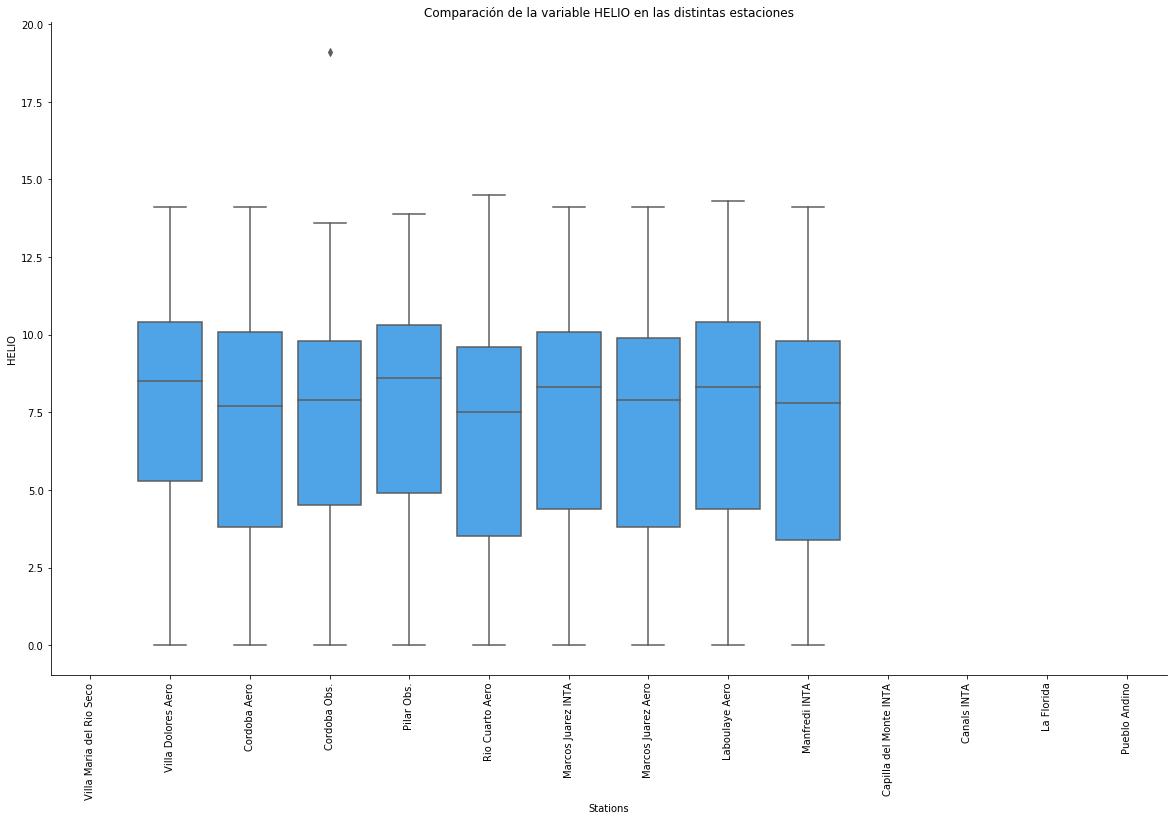

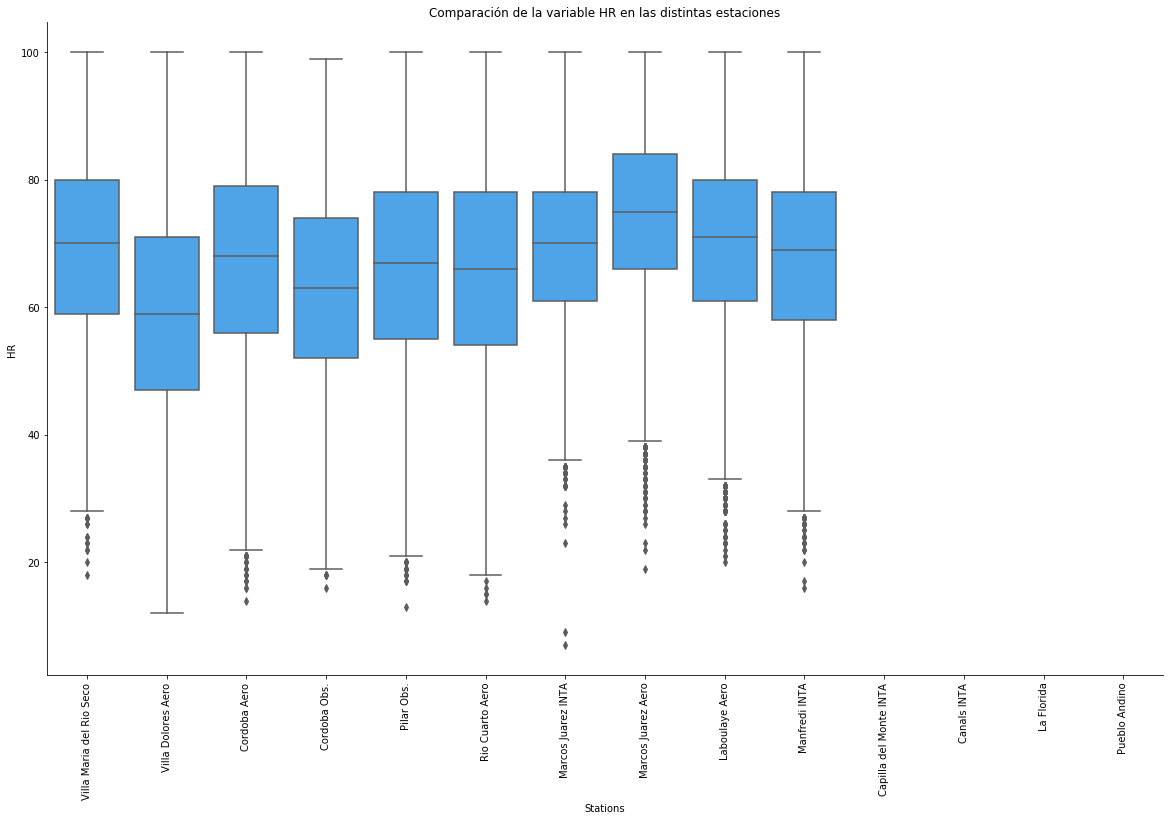

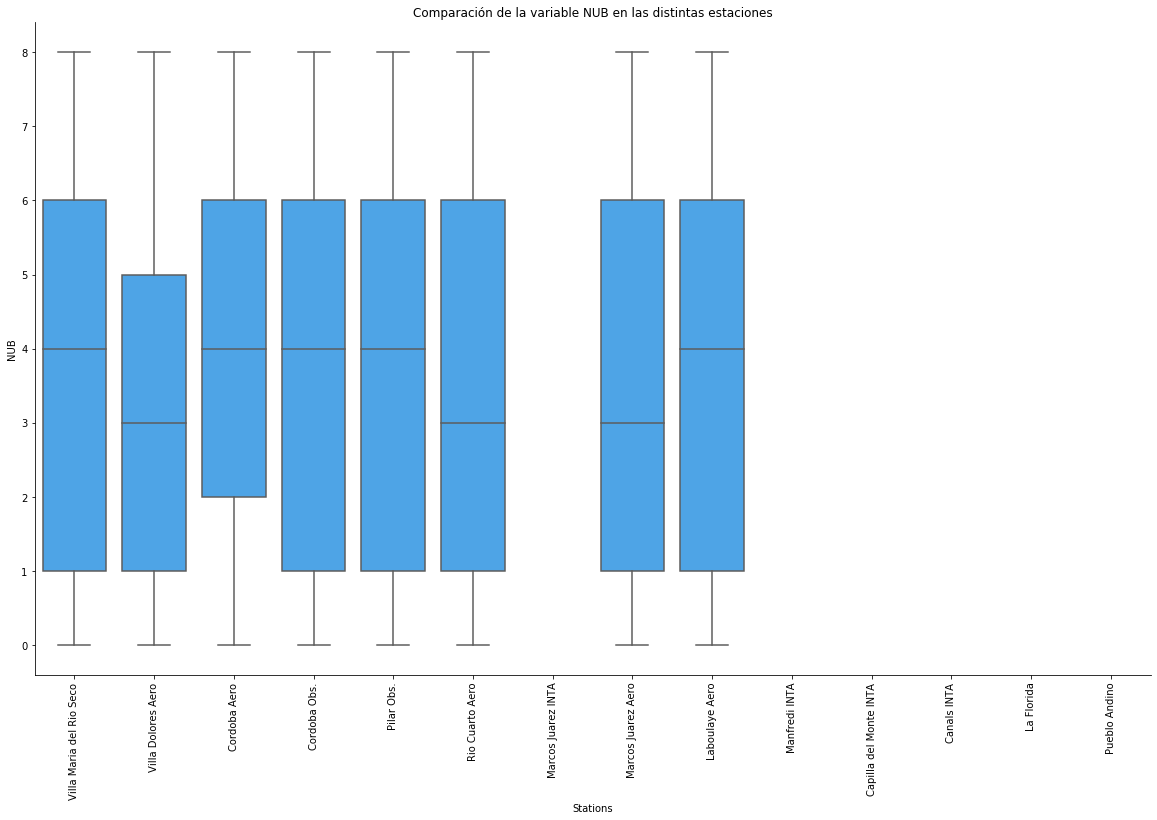

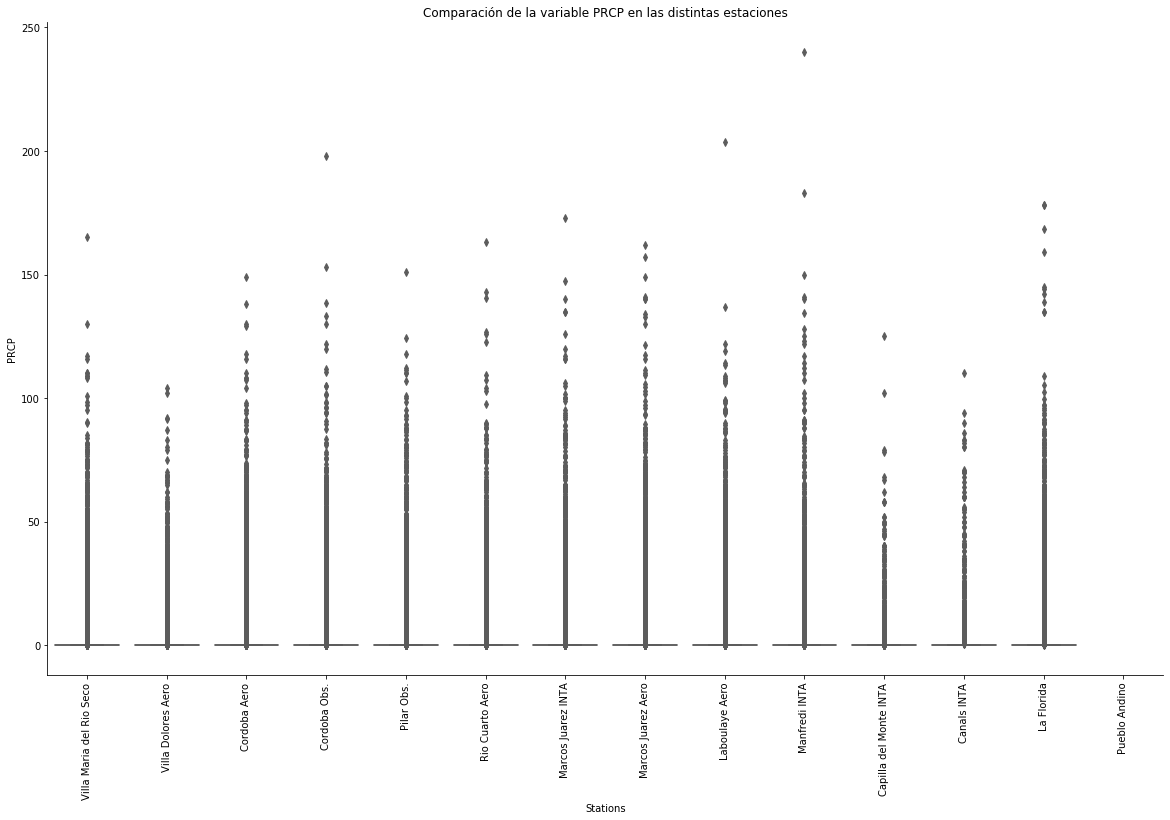

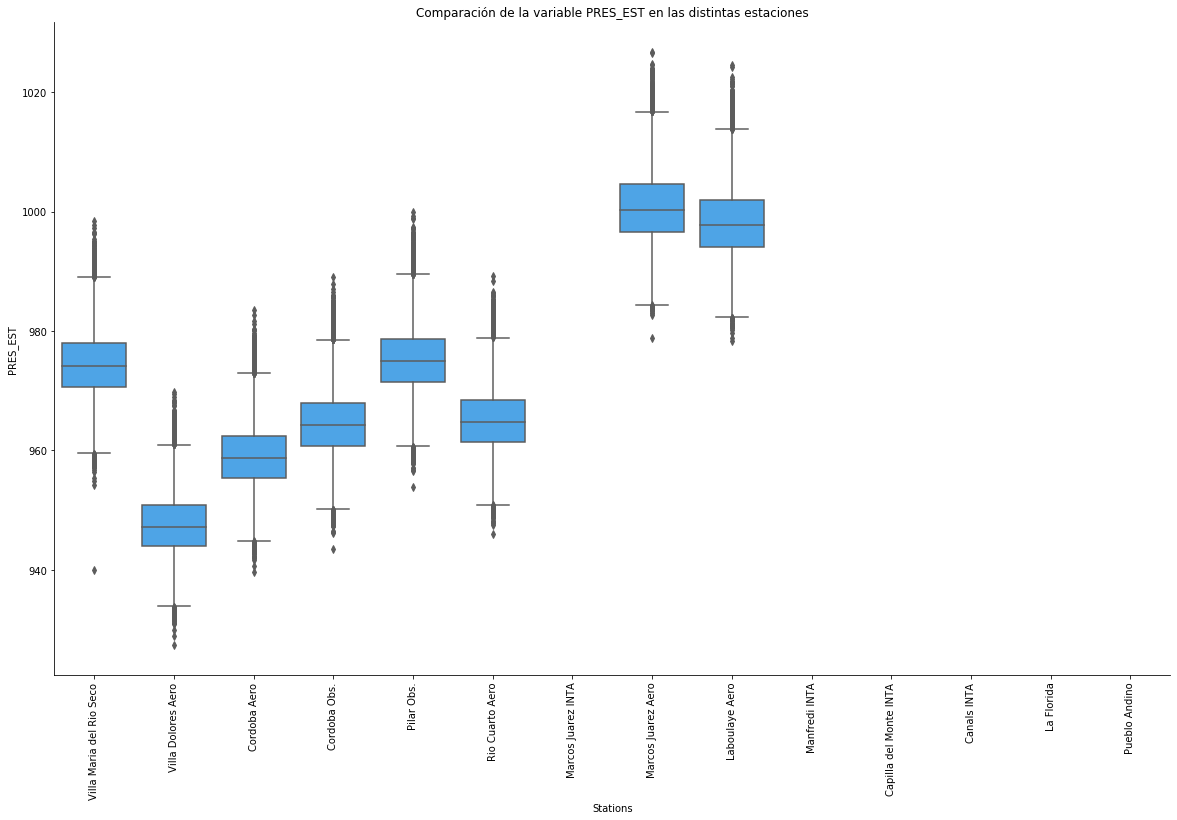

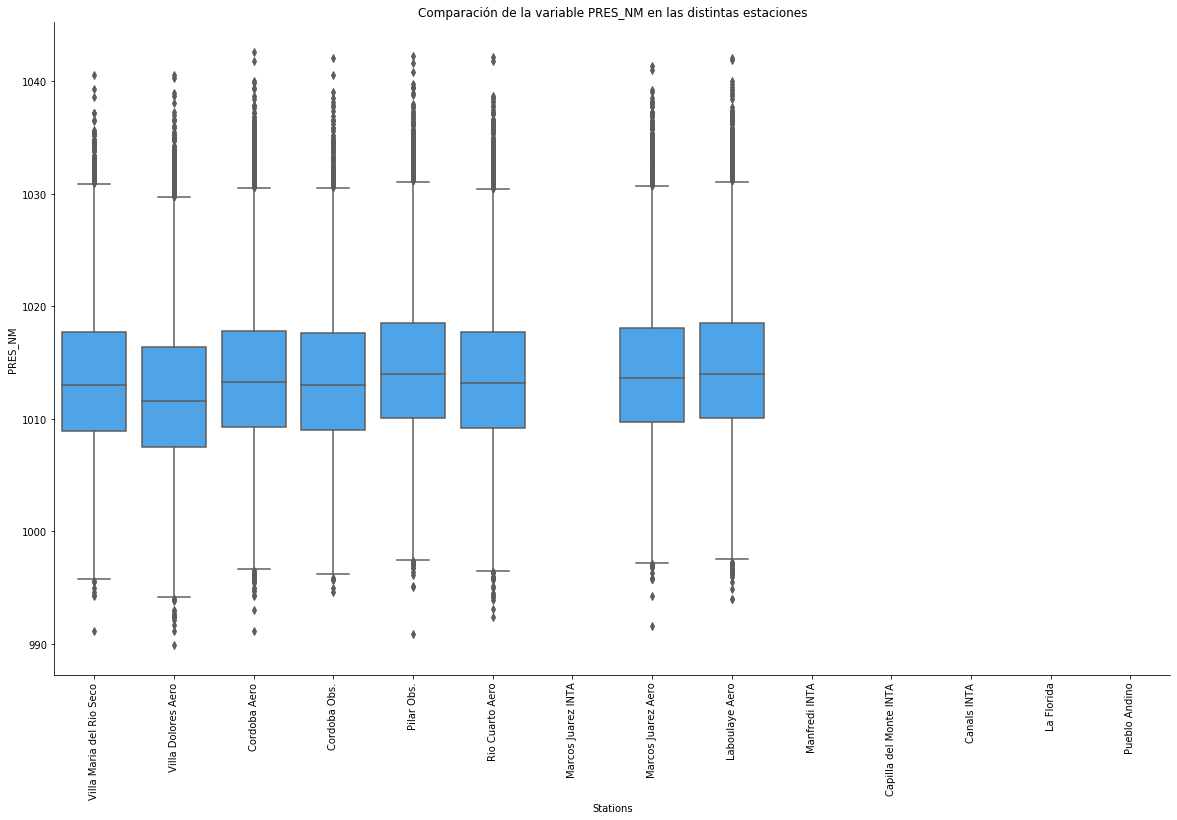

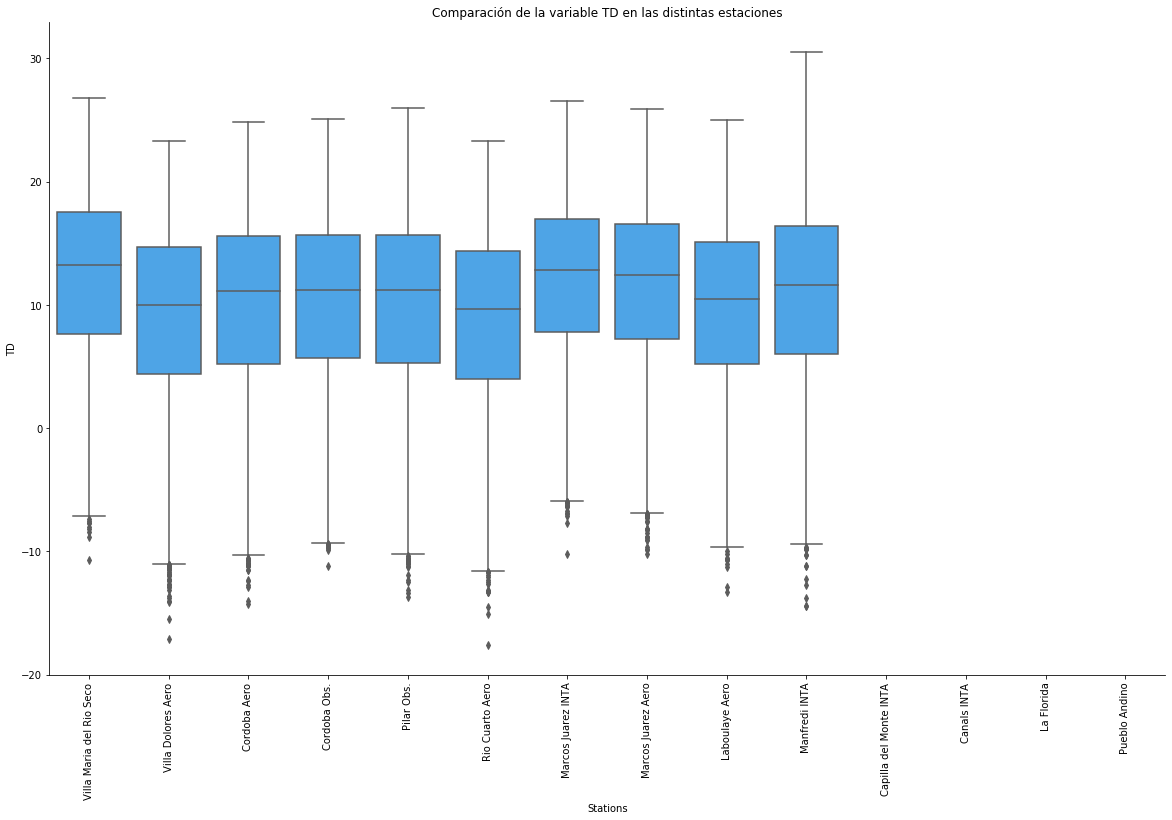

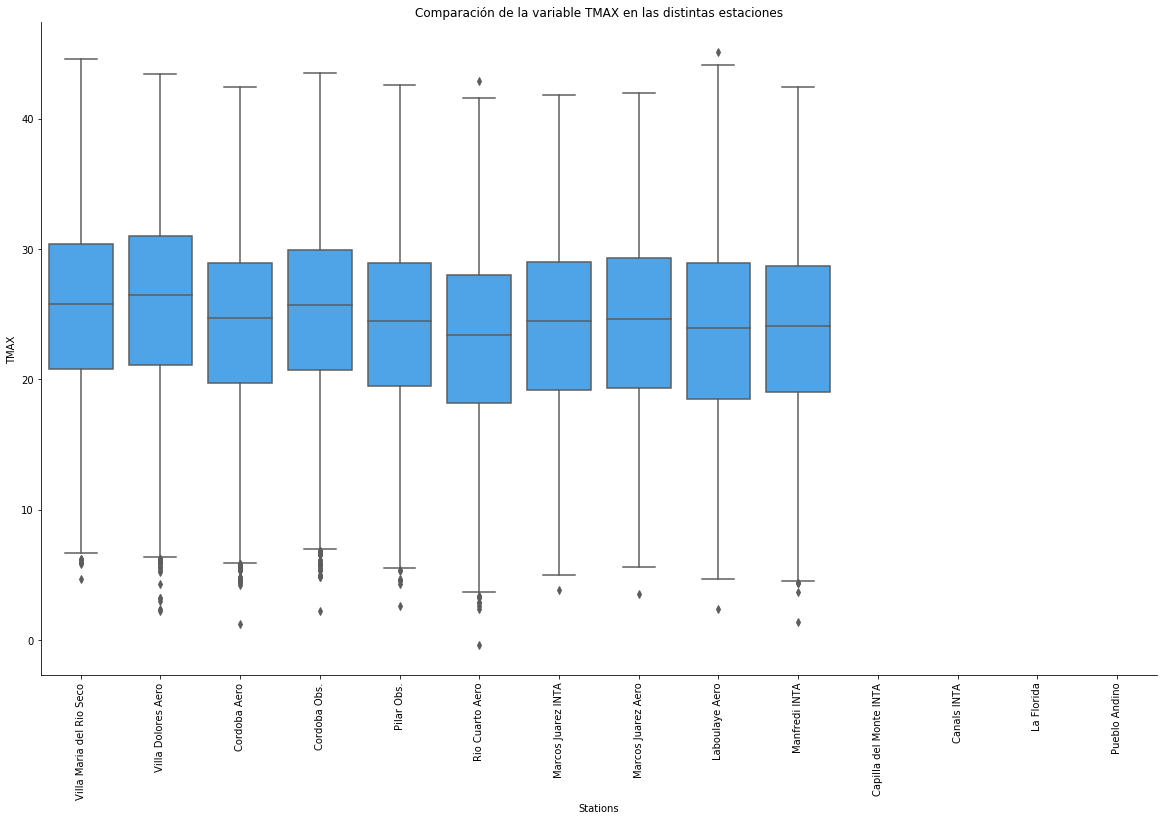

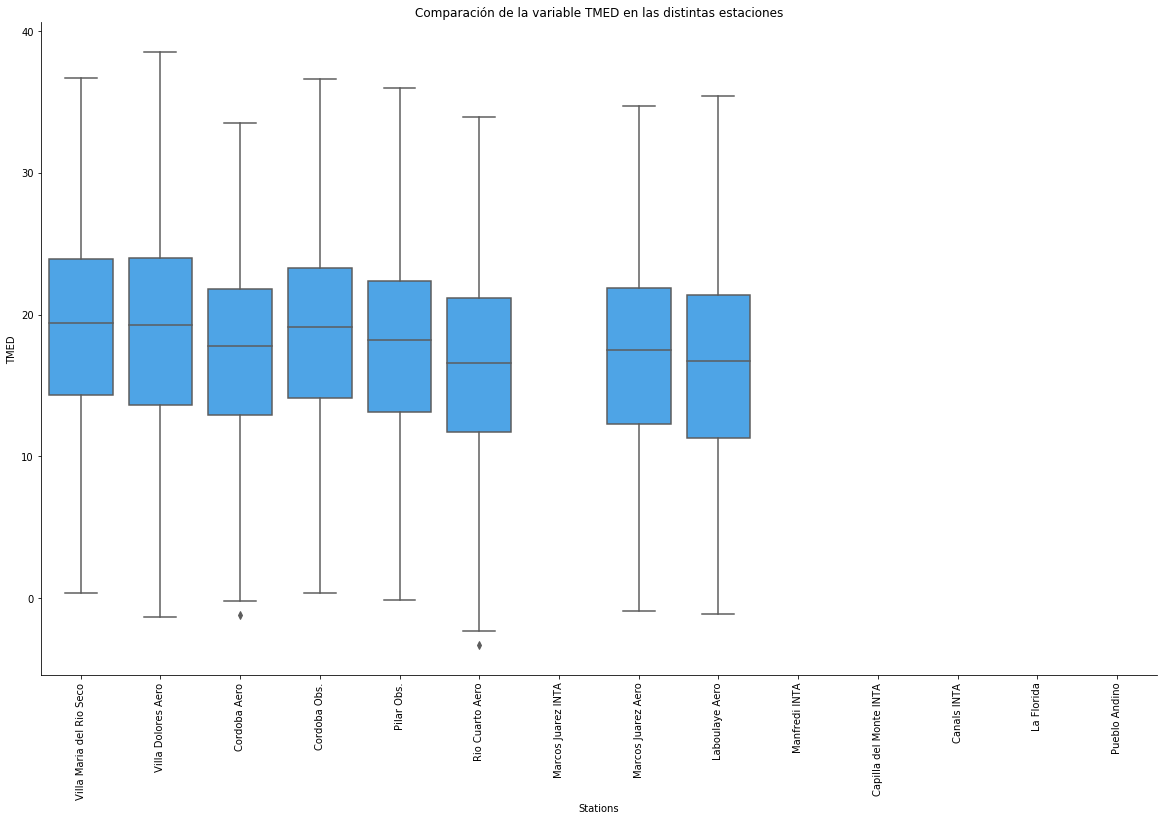

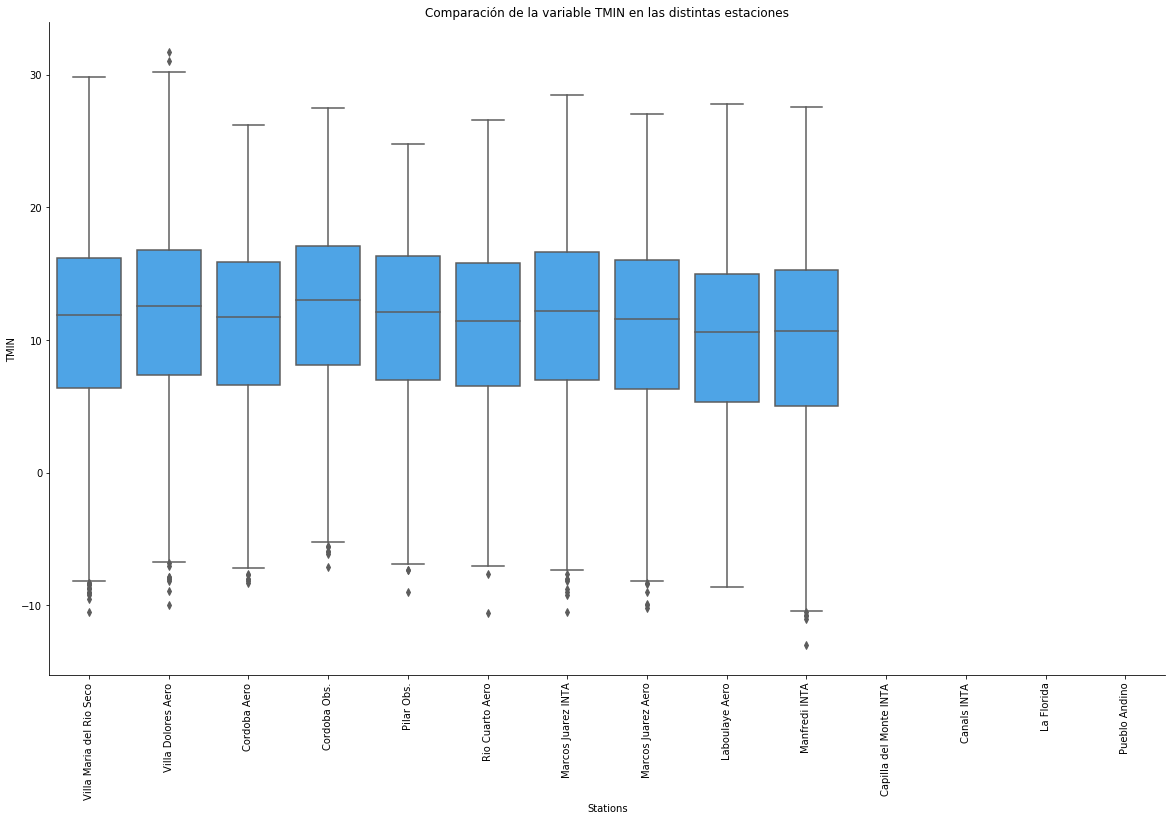

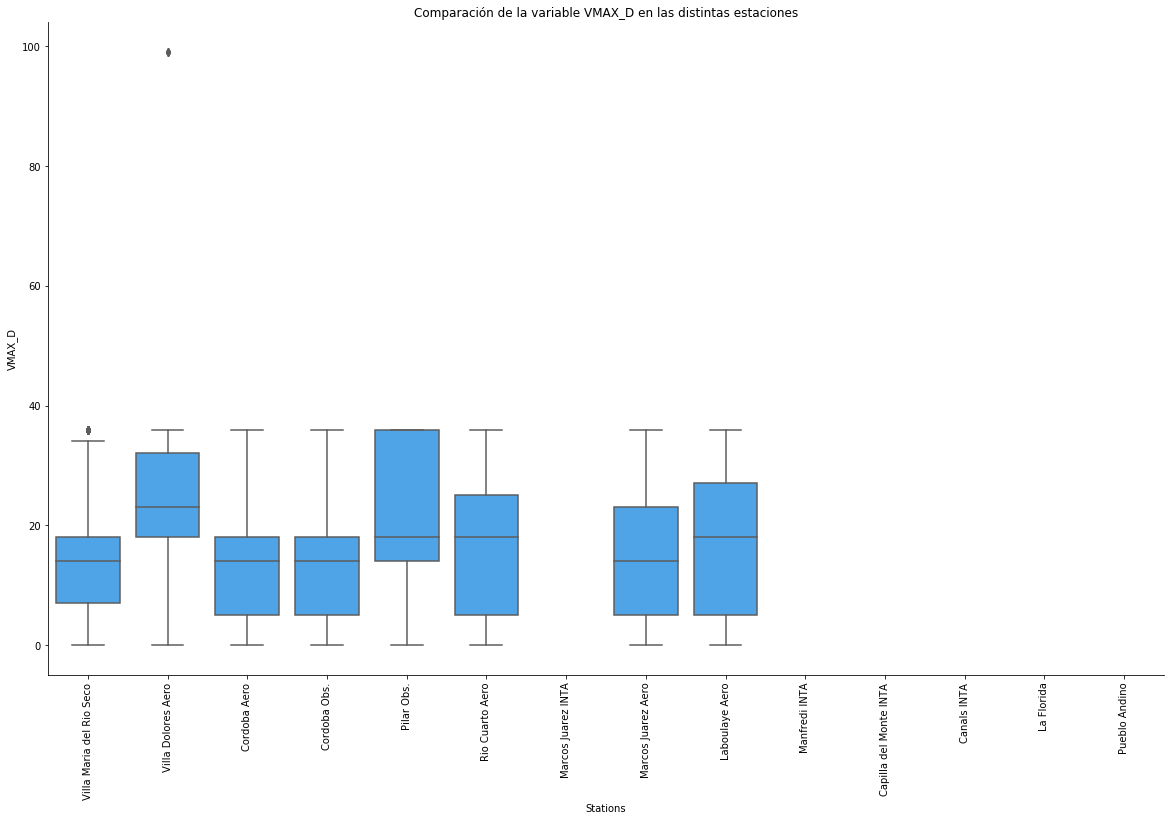

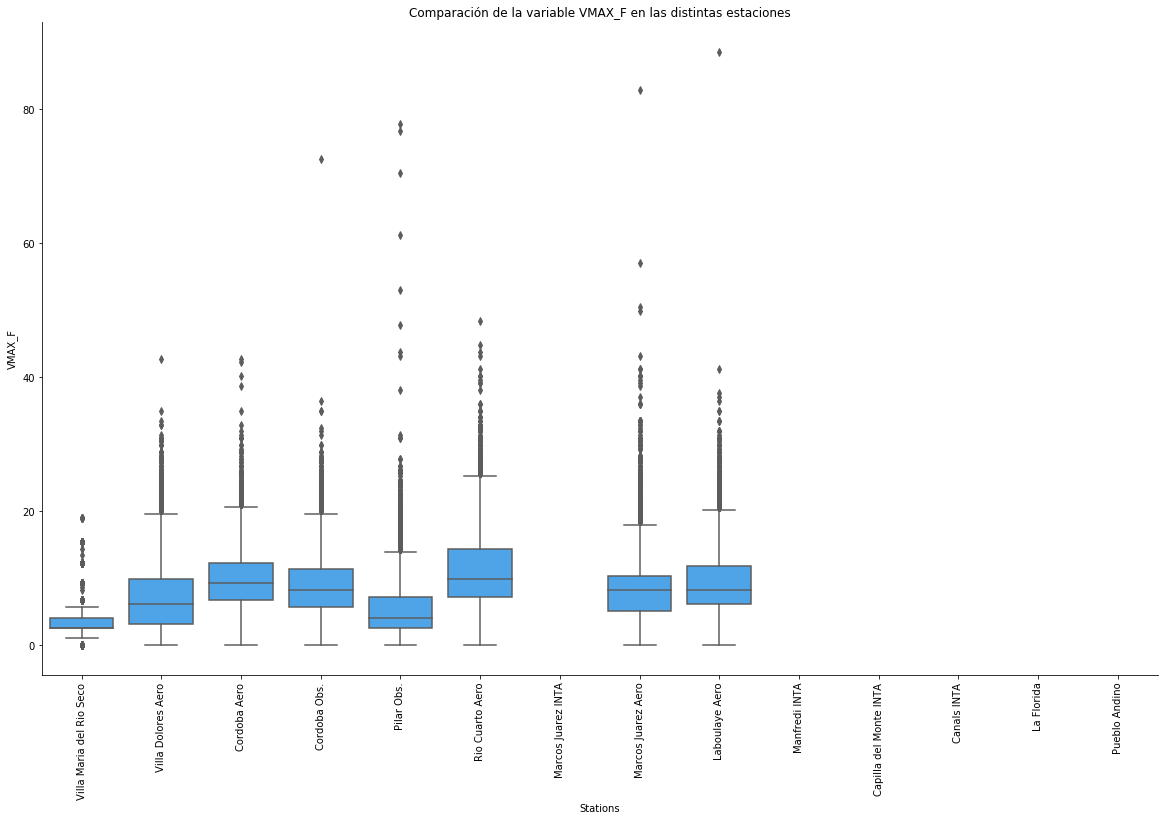

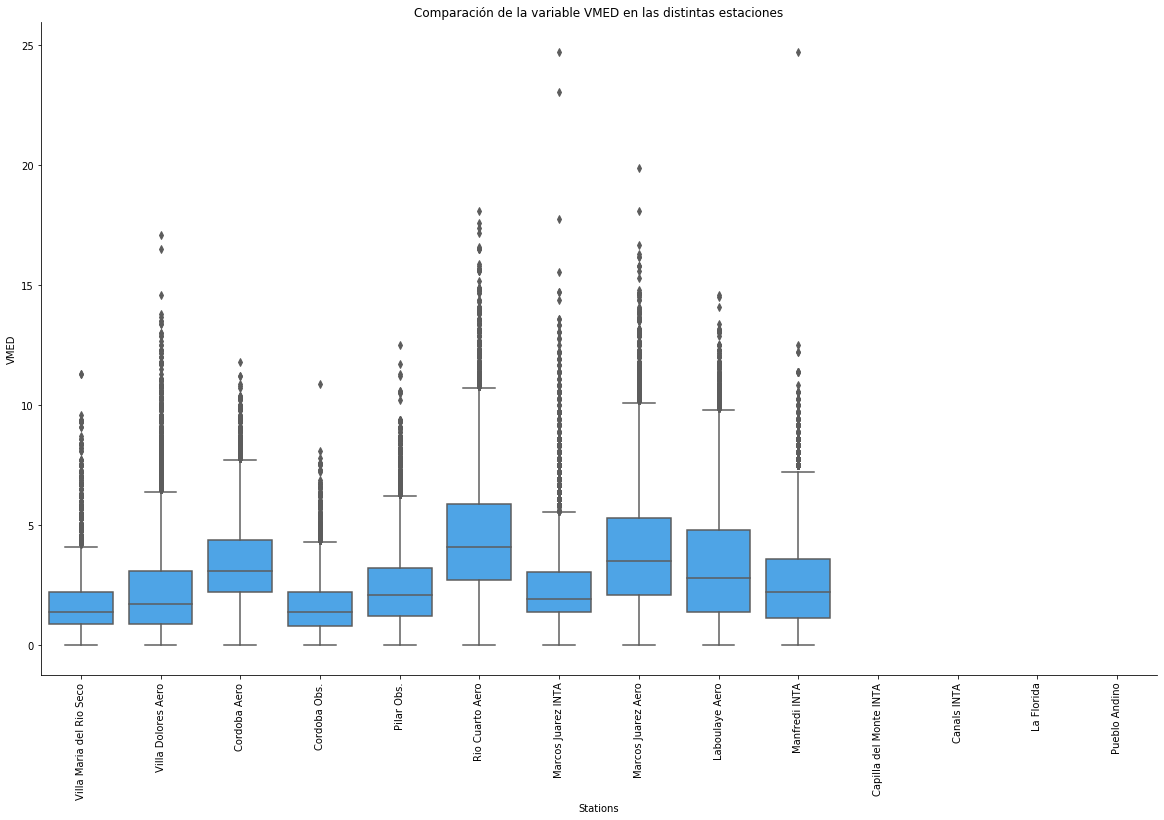

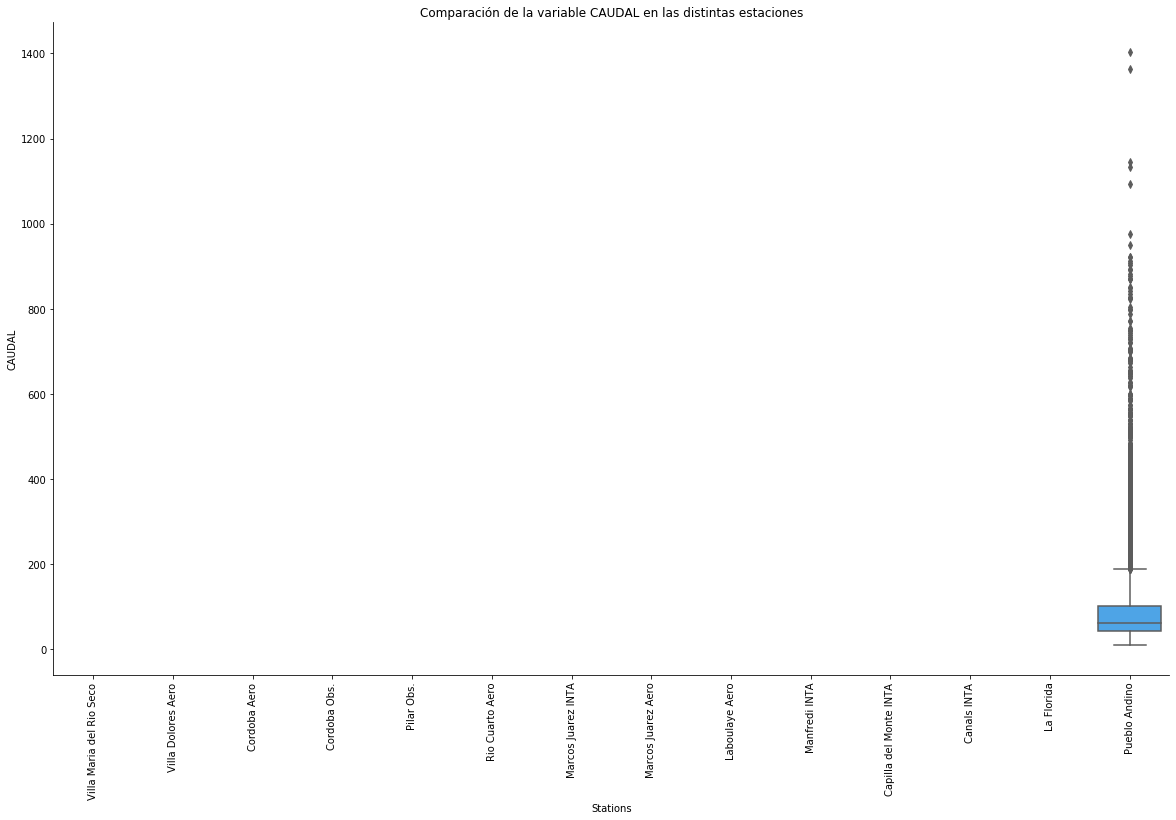

In [21]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

dataset_with_stations = dataset.copy()
dataset_with_stations['station'] = dataset_with_stations['omm_id'].replace(stations)
dataset_with_stations.reset_index(inplace=True)
not_numeric_cols = ['fecha', 'id', 'omm_id', 'station']
numeric_cols = [c for c in dataset_with_stations.columns if c not in not_numeric_cols]
for numeric_col in numeric_cols:
    plt.figure(figsize=(20,12))
    sns.boxplot(data=dataset_with_stations,
                    x='station', y=numeric_col,
                    color=BLUE)
    plt.ylabel(numeric_col.upper())
    plt.xlabel('Stations')
    plt.title(f'Comparación de la variable {numeric_col.upper()} en las distintas estaciones')
    plt.xticks(rotation=90)
    sns.despine()

## 1.4

Observamos valores outliers para las siguientes variables:
* HR
* PRCP *
* PRES_EST
* PRES_NM
* TD
* TMAX
* TMED
* TMIN
* VMAX_D
* VMAX_F *
* VMED *
* CAUDAL
Una complicación de este análisis es la variación interanual ya no es correcto mezclar los valores de distintas épocas del año. Sin embargo, el proceso de control de calidad es muy complejo. 

En las variables marcadas (*) es muy probables que los outliers que se visualizan correspondan a valores correctos, esto es por la naturaleza de la variable analizada.
La precipitación, al tener tanta cantidad de valores iguales a cero complican mucho la detección de outliers a través de métodos gráficos y estadísticos. 
Otra variable con complicaciones son las truncadas como nubosidad que está medida en un rango tan estrecho. 

Tampoco debe menospreciarse la consistencia entre variables, es decir, temperaturas máximas inferiores a las mínimas o precipitaciones en días despejados (o octos). 

In [22]:
def find_outliers(ts, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
    ## dtf output
    dtf_outliers = ts.to_frame(name="ts")
    dtf_outliers["index"] = range(len(ts))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers


 Estación: Villa Maria del Rio Seco


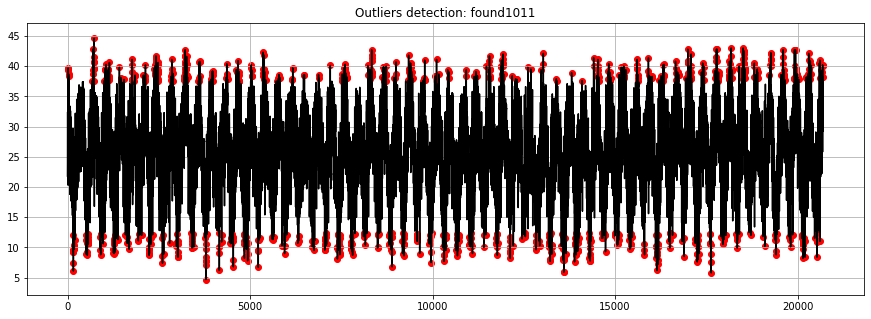


 Estación: Villa Dolores Aero


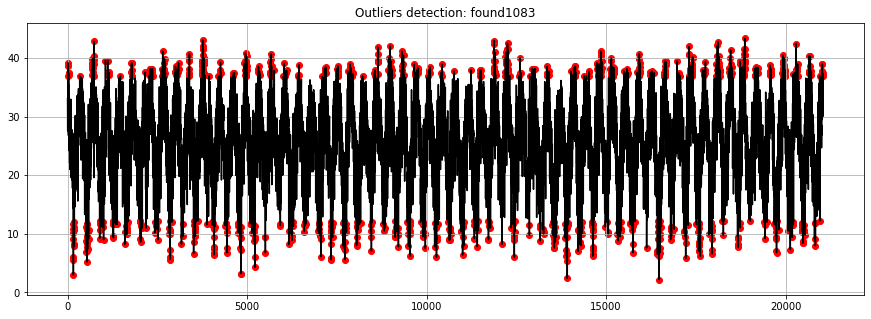


 Estación: Cordoba Aero


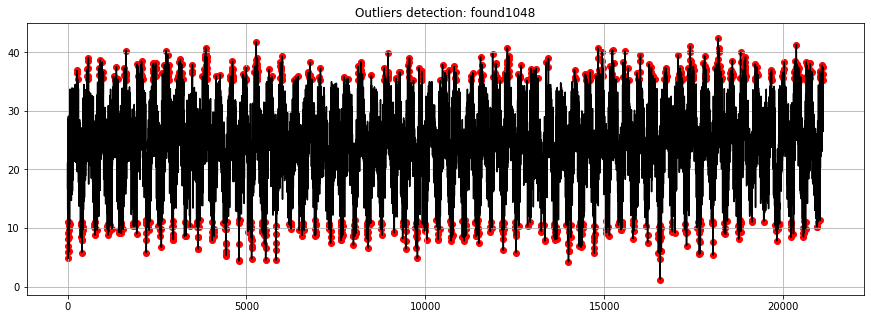


 Estación: Cordoba Obs.


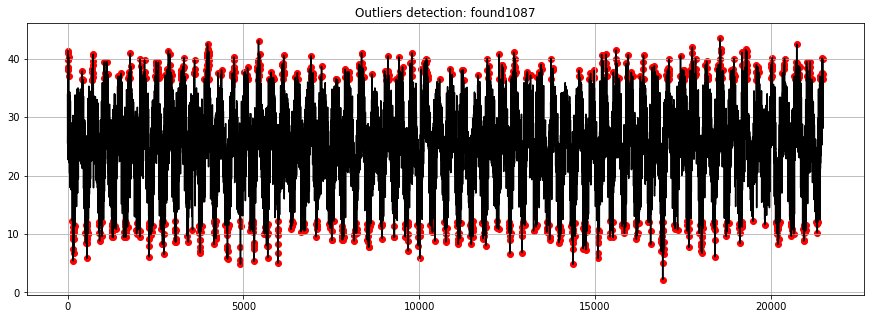


 Estación: Pilar Obs.


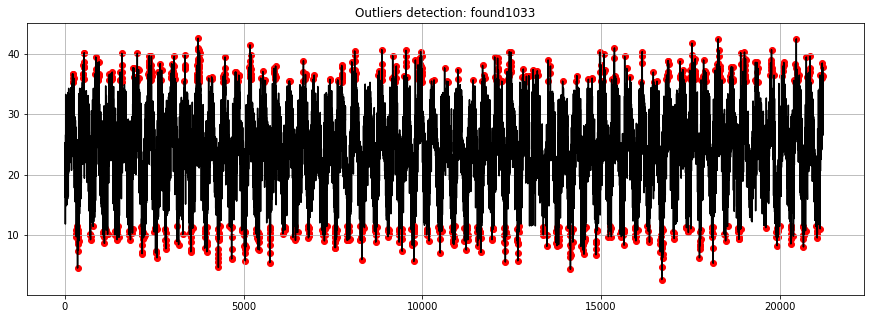


 Estación: Rio Cuarto Aero


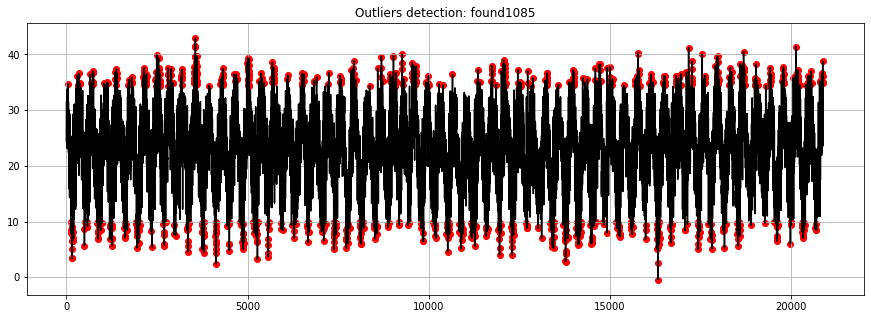


 Estación: Marcos Juarez Aero


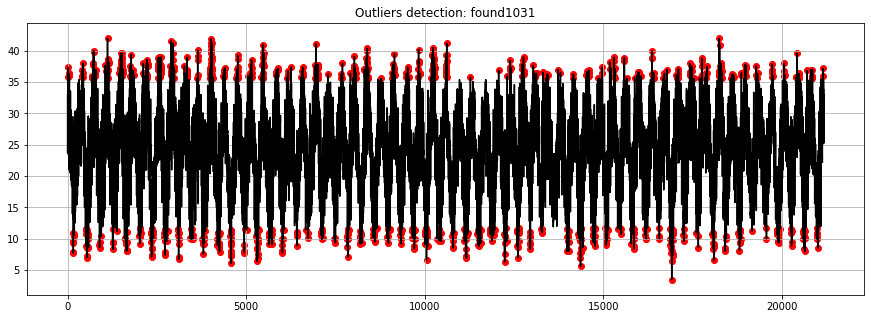


 Estación: Laboulaye Aero


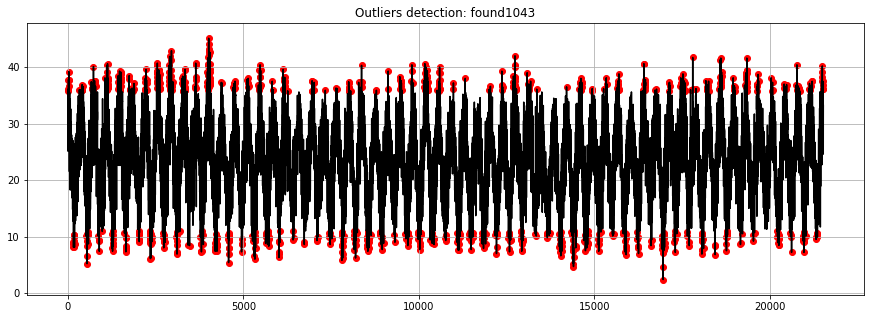

In [23]:
ex = ['Pueblo Andino', 'La Florida', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
for station in stations:
    station_name = stations[station]
    if station_name not in ex:
        print(f'\n Estación: {station_name}')
        data = dataset_with_stations[dataset_with_stations['station'] == stations[station]]
        dtf_outliers = find_outliers(data.tmax.dropna(), perc=0.05)

Si bien se detectan una gran cantidad de outliers, su manipulación en series climáticas es un proceso complejo ya que se podría perder información muy valiosa, sobretodo en los extremos de la distribución y que será motivo de análisis en la presente mentoría. 

Las demás variables también pueden ser analizadas mediante estos gráficos pero sólo se realiza para temperatura a modo de ejemplo.

## 2.1

In [24]:
def get_hydro_year(date_, start_month=7):
    year = date_.strftime('%Y')
    month = date_.strftime('%m')
    offset = 1 if int(month) >= start_month - 1 else 0
    hydro_year = int(year) + offset - 1
    return hydro_year

In [25]:
dataset_with_hydro_year = dataset.copy()
dataset_with_hydro_year.reset_index(inplace=True)
dataset_with_hydro_year['hydro_year'] = dataset_with_hydro_year['fecha'].apply(lambda fecha: get_hydro_year(fecha))
dataset_with_hydro_year['station'] = dataset_with_hydro_year['omm_id'].replace(stations)
dataset_with_hydro_year['station_elev'] = dataset_with_hydro_year['omm_id'].replace(elevs)

In [26]:
prcp_mean_by_hydro_year_and_station = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).sum()['prcp'].groupby(['omm_id']).mean()
prcp_mean_by_hydro_year_and_station_dict = prcp_mean_by_hydro_year_and_station.to_frame().to_dict()
stations_df_prcp_mean = stations_dataset.copy()
stations_df_prcp_mean['prcp_mean'] = stations_dataset['omm_id'].replace(prcp_mean_by_hydro_year_and_station_dict['prcp'])
stations_df_prcp_mean[['omm_id', 'nombre', 'elev', 'prcp_mean']]

,omm_id,nombre,elev,prcp_mean
0,87244,Villa Maria del Rio Seco,341,786.336667
1,87328,Villa Dolores Aero,569,610.985000
2,87344,Cordoba Aero,474,835.306667
3,87345,Cordoba Obs.,426,786.160000
4,87349,Pilar Obs.,338,766.558333
5,87466,Marcos Juarez INTA,110,887.980769
6,87453,Rio Cuarto Aero,421,826.910000
7,87467,Marcos Juarez Aero,114,910.680000
8,87534,Laboulaye Aero,137,873.285000
9,9987009,Manfredi INTA,292,771.646939


Text(0.5, 0, 'Precipitación [mm]')

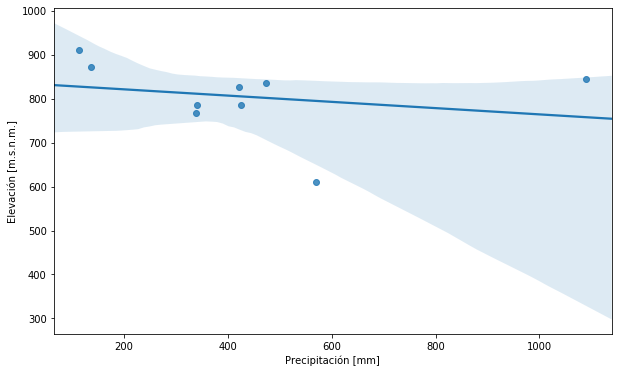

In [27]:
plt.figure(figsize=(10,6))

ex = ['Pueblo Andino', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']

stations_df_prcp_mean_filtered = stations_df_prcp_mean[~stations_df_prcp_mean.nombre.isin(ex)]

ax = sns.regplot(x="elev", y="prcp_mean", data=stations_df_prcp_mean_filtered)
plt.ylabel('Elevación [m.s.n.m.]')
plt.xlabel("Precipitación [mm]")

Si bien la cantidad de puntos es muy exigua se podría pensar que existe una relación inversa entre la precipitación acumulada anual y la elevación. Esto quiere decir que la precipitación aumenta desde las Sierras de Córdoba hacia el este, lo que es coincidente con el gradiente de las isohietas.

La localidad de La Florida rompe un poco este patrón pero esto es debido a su posición geográfica y al efecto de la orografía.

## 2.2

In [28]:
pueblo_andino_s_caudal_sum = dataset_with_hydro_year[dataset_with_hydro_year['omm_id'] == 2].groupby(['hydro_year'])['caudal'].sum()
pueblo_andino_s_caudal_sum

hydro_year
1979     4776.920000
1980    26842.196000
1981    22752.626000
1982    18063.433000
1983    30056.648000
1984    25702.124000
1985    26768.188000
1986    23429.423000
1987    24969.438000
1988    14887.941000
1989    17725.992000
1990    27159.531000
1992     8329.016000
1993    41478.948000
1994    24591.611000
1995    20122.878000
1996    11818.886000
1997    30084.455000
1998    30233.897000
1999    40710.882840
2000    38582.123230
2001    59214.508710
2002    37322.560500
2003    19279.782870
2004    35631.935130
2005    22152.961740
2006    41325.916970
2007    25554.459230
2008    17674.592240
2009    29793.352290
2010    22210.965248
2011    19134.404550
2012    54634.630840
2013    41864.833000
2014    58444.562949
2015    77834.273001
2016    49119.316340
2017     7431.643070
Name: caudal, dtype: float64

In [29]:
adfuller_test = sm.tsa.stattools.adfuller(pueblo_andino_s_caudal_sum.dropna(), maxlag=5, autolag="AIC")
adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
p = round(p, 3)
conclusion = "Estacionaria" if p < 0.05 else "No Estacionaria"
print(conclusion)

Estacionaria


In [30]:
mk.hamed_rao_modification_test(pueblo_andino_s_caudal_sum)

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=0.022132474436973526, z=2.2880866687609664, Tau=0.2603129445234708, s=183.0, var_s=6327.0, slope=585.4231422727288, intercept=15404.827867954513)

In [31]:
mk.sens_slope(pueblo_andino_s_caudal_sum)

Sens_Slope_Test(slope=585.4231422727288, intercept=15404.827867954513)

El test de  Dickey-Fuller indica que la serie es estacionaria dado que el p-valor de la prueba es menor a 0.05. Que sea estacionaria implica que la media y la varianza son relativamente constantes a lo largo de los años. Sin embargo, al realizar la prueba de Mann-Kendall, el test indica que la tendencia es positiva y estadísticamente significativa. 

Text(0.5, 0, 'Años')

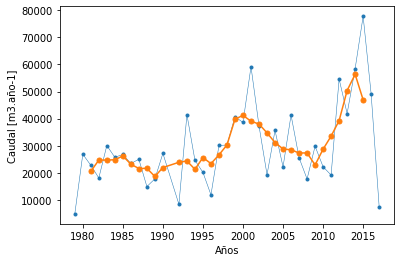

In [32]:
caudal = pueblo_andino_s_caudal_sum.copy().to_frame()
caudal.index.name = 'hydro_year'
caudal.reset_index(inplace=True)

caudal_5 = pueblo_andino_s_caudal_sum.rolling(5, center=True).mean().to_frame()
caudal_5.index.name = 'hydro_year'
caudal_5.reset_index(inplace=True)


fig, ax = plt.subplots()
ax.plot('hydro_year', 'caudal', marker='.', linestyle='-', linewidth=0.5, label='Anual', data = caudal)
ax.plot('hydro_year', 'caudal', marker='o', markersize=5, linestyle='-', label='Media móvil de 5 años', data = caudal_5)
plt.ylabel('Caudal [m3.año-1]')
plt.xlabel("Años")

La media movil de cinco años permite filtrar la variabilidad interanual de alta frecuencia y visualizar la tendencia de más largo plazo. Se podría concluir que los caudales en la salida de la cuenca están aumentando.

## 2.3

In [33]:
pmda_prcp_max = dataset_with_hydro_year.groupby(['hydro_year', 'station'])['prcp'].max()
pmda_prcp_max_df = pmda_prcp_max.to_frame().reset_index()

In [34]:
for station in stations:
    station_name = stations[station]
    if 'Pueblo Andino' != station_name:
        print(f'\n Estación: {station_name}')
        data = pmda_prcp_max_df[pmda_prcp_max_df['station'] == stations[station]]['prcp']
        print(mk.hamed_rao_modification_test(data))
        print(mk.sens_slope(data))


 Estación: Villa Maria del Rio Seco
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.12269960237515654, z=-1.5435408566926845, Tau=-0.15141242937853108, s=-268.0, var_s=29921.699958227022, slope=-0.28651515151515133, intercept=78.35219696969698)
Sens_Slope_Test(slope=-0.28651515151515133, intercept=78.35219696969698)

 Estación: Villa Dolores Aero
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.22830841436827365, z=1.204727763608024, Tau=0.09491525423728814, s=168.0, var_s=19215.65108501739, slope=0.1336342229199372, intercept=47.55779042386185)
Sens_Slope_Test(slope=0.1336342229199372, intercept=47.55779042386185)

 Estación: Cordoba Aero
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.19095506582412058, z=1.3077589964825242, Tau=0.11638418079096045, s=206.0, var_s=24572.666666666668, slope=0.23881506090808413, intercept=65.55495570321152)
Sens_Slope_Test(slope=0.23881506090808413, intercept=65.5549

A partir del análisis anterior, se puede concluir que la única estación que tiene una endencia estadísticamente significativa corresponde a Laboulaye, que muestra un incremento de 0.3 mm por año a partir de una ordenada de 62 mm.

### 2.4

In [35]:
tmed_max = dataset_with_hydro_year.groupby(['hydro_year', 'station'])['tmed'].max()
tmed_max_df = tmed_max.to_frame().reset_index()

In [36]:
ex = ['Pueblo Andino', 'La Florida', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
for station in stations:
    station_name = stations[station]
    if station_name not in ex:
        print(f'\n Estación: {station_name}')
        data = tmed_max_df[tmed_max_df['station'] == stations[station]]['tmed']
        print(mk.hamed_rao_modification_test(data))
        print(mk.sens_slope(data))


 Estación: Villa Maria del Rio Seco
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.44744318077190814, z=-0.7596845254226279, Tau=-0.06779661016949153, s=-120.0, var_s=24537.333333333332, slope=-0.009523809523809405, intercept=33.48095238095238)
Sens_Slope_Test(slope=-0.009523809523809405, intercept=33.48095238095238)

 Estación: Villa Dolores Aero
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.297347340425933, z=-1.0421387819784487, Tau=-0.09143686502177069, s=-126.0, var_s=14386.955824560711, slope=-0.014589665653495433, intercept=32.781458966565346)
Sens_Slope_Test(slope=-0.014589665653495433, intercept=32.781458966565346)

 Estación: Cordoba Aero
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.4218417008952424, z=0.8032301866558773, Tau=0.06836158192090395, s=121.0, var_s=22319.39657791385, slope=0.008081632653061232, intercept=29.311591836734696)
Sens_Slope_Test(slope=0.008081632653061232, int

Ninguna estación mostró una tendencia estadísticamente significativa. 

### 2.5 Distribución de los datos

In [37]:
ex = ['Pueblo Andino', 'Capilla del Monte INTA', 'Canals INTA']
for station in stations:
    station_name = stations[station]
    if station_name not in ex:
        print(f'\n Estación: {station_name}')
        data = pmda_prcp_max_df[pmda_prcp_max_df['station'] == stations[station]]['prcp']
        media = data.mean()
        sd = data.std()
        print(f'\n Media: {media}', f'n Desvío: {sd}')
        p_value = st.kstest(rvs=list(data.dropna()), cdf='norm', args=(media,sd))
        print(p_value)


 Estación: Villa Maria del Rio Seco

 Media: 73.44 n Desvío: 24.96277363989447
KstestResult(statistic=0.1324995204888021, pvalue=0.2225387531958979)

 Estación: Villa Dolores Aero

 Media: 55.28666666666666 n Desvío: 17.717639077012397
KstestResult(statistic=0.13936777620951746, pvalue=0.1768600075695397)

 Estación: Cordoba Aero

 Media: 78.40166666666667 n Desvío: 24.95353982339007
KstestResult(statistic=0.12370117255012436, pvalue=0.2936901884559181)

 Estación: Cordoba Obs.

 Media: 77.87000000000002 n Desvío: 31.880466895758058
KstestResult(statistic=0.12713375356840445, pvalue=0.2641569923831524)

 Estación: Pilar Obs.

 Media: 74.72833333333332 n Desvío: 24.075087987002682
KstestResult(statistic=0.12359081707032049, pvalue=0.2946784977967597)

 Estación: Marcos Juarez INTA

 Media: 86.10192307692309 n Desvío: 29.191601601700413
KstestResult(statistic=0.08739060818860944, pvalue=0.8219793003724072)

 Estación: Rio Cuarto Aero

 Media: 76.295 n Desvío: 27.097979316746986
KstestRe

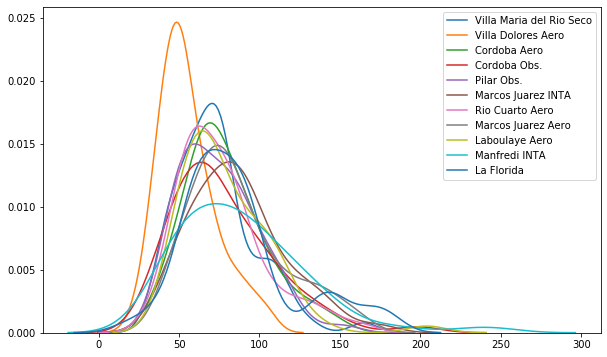

In [38]:
plt.figure(figsize=(10,6))

ex = ['Pueblo Andino', 'Capilla del Monte INTA', 'Canals INTA']
for station in stations:
    station_name = stations[station]
    if station_name not in ex:
        data = pmda_prcp_max_df[pmda_prcp_max_df['station'] == stations[station]]['prcp']
        sns.kdeplot(
            data.dropna(), label = station_name)

A partir de las pruebas gráficas y estadísticas se puede concluir que la PMDA se ajusta a una distribución normal aunque esto no quiere decir que la normal sea la más óptima para modelar esta variable. La mayoría de las estaciones están concentradas en torno a la media de 80 mm a eexcepción de la estación de Villa Dolores que rompe este patrón, posiblemente debido a su ubicación detras de las Sierras de Córdoba.

Algunas estaciones, como La Florida pareciera tener un comportamiento binomial, aunque se debería comprobar.

In [39]:
ex = ['Pueblo Andino', 'La Florida', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
for station in stations:
    station_name = stations[station]
    if station_name not in ex:
        print(f'\n Estación: {station_name}')
        data = tmed_max_df[tmed_max_df['station'] == stations[station]]['tmed']
        media = data.mean()
        sd = data.std()
        print(f'\n Media: {media}', f'n Desvío: {sd}')
        p_value = st.kstest(rvs=list(data.dropna()), cdf='norm', args=(media,sd))
        print(p_value)


 Estación: Villa Maria del Rio Seco

 Media: 33.36333333333333 n Desvío: 1.5612865909912375
KstestResult(statistic=0.08975737528158245, pvalue=0.7177522430091505)

 Estación: Villa Dolores Aero

 Media: 32.87358490566038 n Desvío: 1.8452799395084736
KstestResult(statistic=0.13147243899431427, pvalue=0.2933639568048042)

 Estación: Cordoba Aero

 Media: 29.720000000000002 n Desvío: 1.422673539502299
KstestResult(statistic=0.09965922909318814, pvalue=0.5692652087217804)

 Estación: Cordoba Obs.

 Media: 31.80333333333333 n Desvío: 1.739371274161595
KstestResult(statistic=0.07790652505592843, pvalue=0.8596665887833087)

 Estación: Pilar Obs.

 Media: 30.794999999999998 n Desvío: 1.9243687056419922
KstestResult(statistic=0.0661764680840865, pvalue=0.9553085730825741)

 Estación: Rio Cuarto Aero

 Media: 29.59666666666667 n Desvío: 1.660096655003799
KstestResult(statistic=0.12321710494232213, pvalue=0.2980435314567585)

 Estación: Marcos Juarez Aero

 Media: 30.0 n Desvío: 1.63147016989408

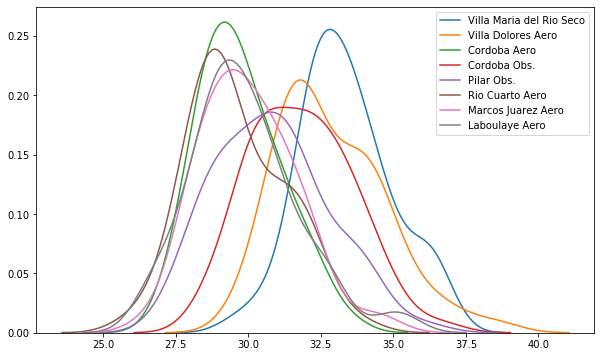

In [40]:
plt.figure(figsize=(10,6))

ex = ['Pueblo Andino', 'La Florida', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
for station in stations:
    station_name = stations[station]
    if station_name not in ex:
        data = tmed_max_df[tmed_max_df['station'] == stations[station]]['tmed']
        sns.kdeplot(
            data.dropna(), label = station_name)

A partir de las pruebas gráficas y estadísticas se puede concluir que la TMDA se ajusta a una distribución normal aunque esto no quiere decir que la normal sea la más óptima para modelar esta variable. A grades razgos se observan dos grupos de estaciones, aquellas ubicadas en la trancisión hacia climas secos, Villa María del Río Seco y Villa Dolores, con medias de alrededor de 35° mientras que las demás tienen una media cercana a 28°. Es notable también la diferencia entre las mediciones en el Observatorio de Córdoba y el Aeropuerto de Córdoba. Esto podría deberse al efecto Isla de Calor creado por la ciudad. 


 Estación: Villa Maria del Rio Seco


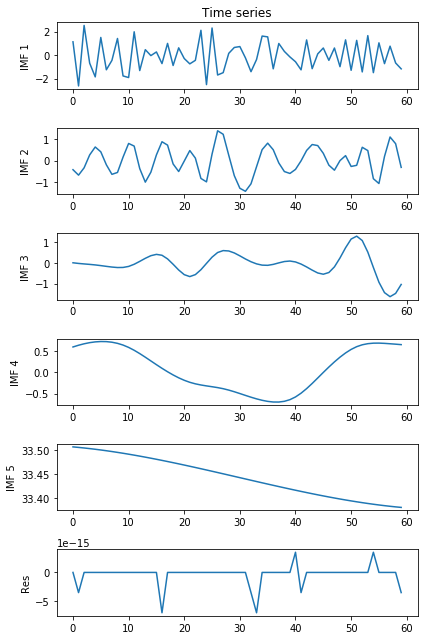


 Estación: Villa Dolores Aero


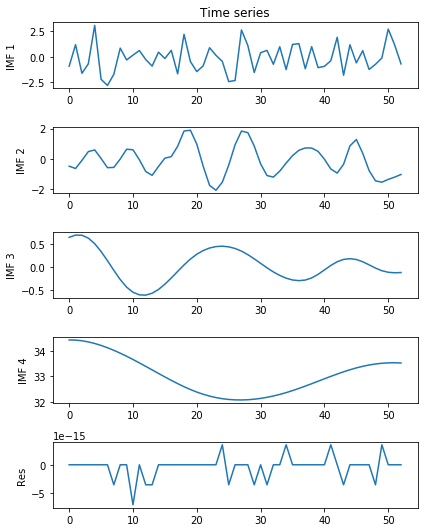


 Estación: Cordoba Aero


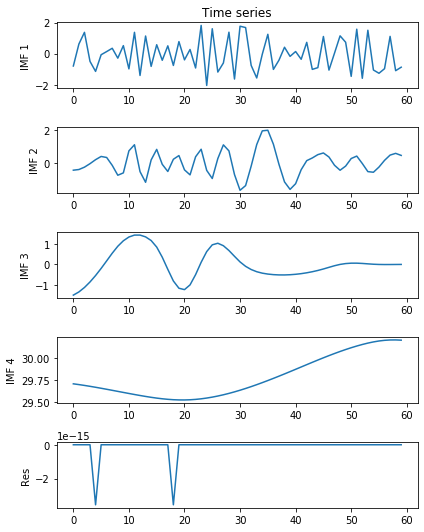


 Estación: Cordoba Obs.


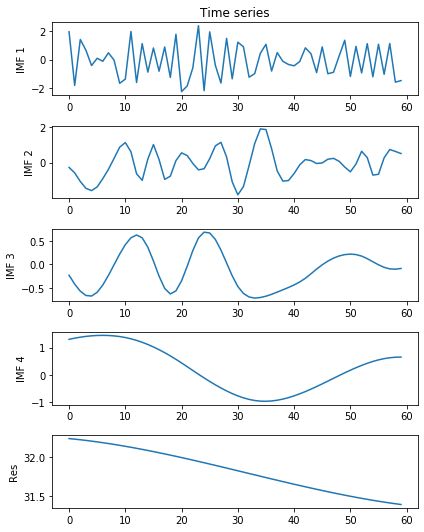


 Estación: Pilar Obs.


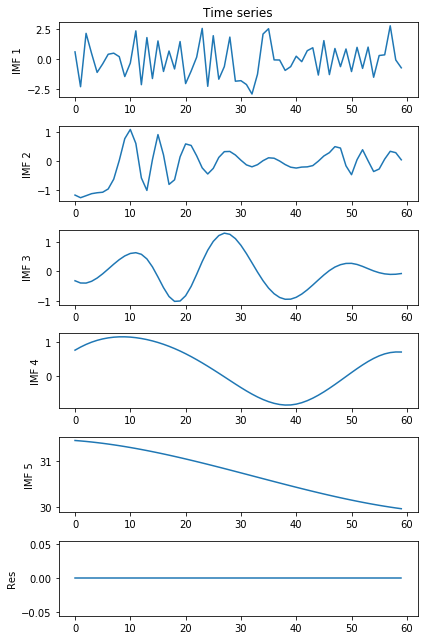


 Estación: Rio Cuarto Aero


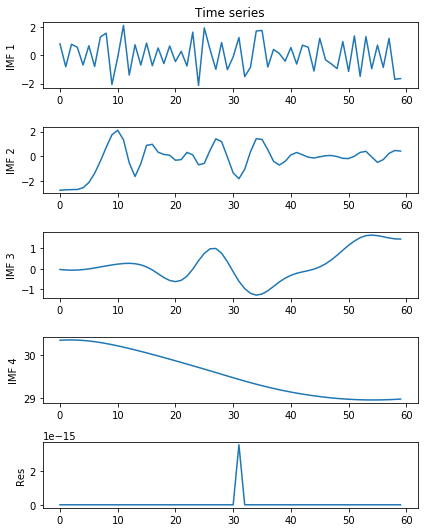


 Estación: Marcos Juarez Aero


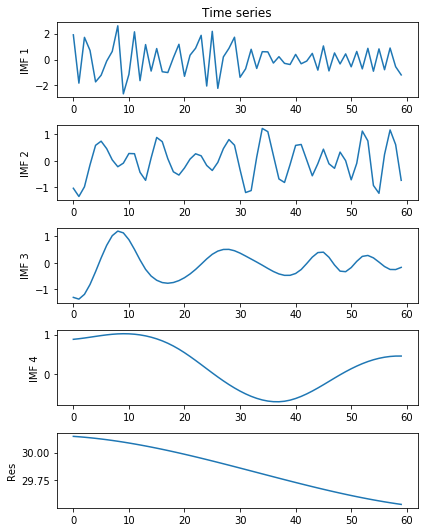


 Estación: Laboulaye Aero


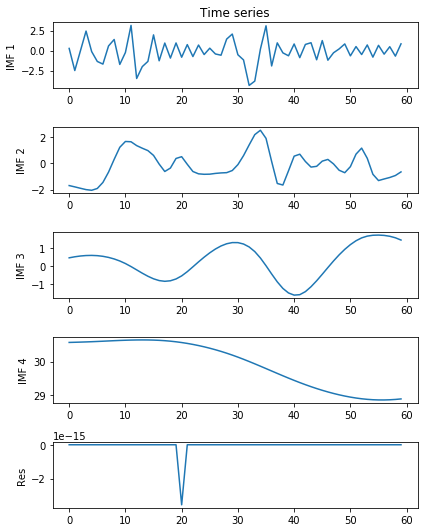

In [41]:
# Descomposicióm empírica de modos

ex = ['Pueblo Andino', 'La Florida', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
for station in stations:
    station_name = stations[station]
    if station_name not in ex:
        
        print(f'\n Estación: {station_name}')


        data = tmed_max_df[tmed_max_df['station'] == stations[station]]['tmed']
        
        emd = EMD()
        vis = Visualisation()
        emd.emd = emd(np.array(data.dropna()))
        imfs, res = emd.get_imfs_and_residue()
        
        vis.plot_imfs(imfs=imfs, residue=res)
        vis.show()

La descomposición empírica de modos permite analizar los modos de variabilidad de cada una de las variables. Estos modos filtran variaciones interanuales de distintas magnitud lo que permite su asociación con otras variables o indicadores del clima. Además, los residuos de la descomposición permite evaluar la tendencia no lineal si esta existe. 